In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'East Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
611,611,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.72,0.05,0.24,...,0.43,13.30,1.28,48.43,0.035733,0.022141,0.252896,0.104427,-0.049623,Topioca
612,612,17.44,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.45,0.06,0.32,...,0.49,16.71,1.54,61.84,0.035733,0.022141,0.252896,0.104427,-0.049623,"Topioca, Cashew"
613,613,17.43,81.92,East Godavari,Gangavaram,Gangavaram,Red Soils,5.93,0.08,0.39,...,0.51,24.27,1.72,47.76,0.037498,0.025191,0.257796,0.106001,-0.050333,Paddy
614,614,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,5.33,0.08,0.58,...,0.35,84.06,2.40,33.52,0.044845,0.029772,0.289270,0.120424,-0.056792,Paddy
615,615,17.42,81.91,East Godavari,Gangavaram,Gangavaram,Red Soils,6.95,0.05,0.23,...,0.42,13.43,1.69,32.92,0.044845,0.029772,0.289270,0.120424,-0.056792,"Topica, Paddy"


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,6.226818,0.209773,0.482273,12.031591,157.500000,953.750000,206.409091,9.929091,0.894091,0.422955,37.901591,1.845909,36.977727,0.115013
std,0.746171,0.495681,0.217286,18.528432,70.436348,753.495208,153.266346,11.099844,0.581147,0.166616,32.566430,0.899215,19.727601,0.016416
min,4.820000,0.040000,0.080000,0.740000,57.000000,223.000000,33.000000,1.040000,0.320000,0.170000,5.050000,0.500000,5.090000,0.091336
25%,5.767500,0.060000,0.357500,2.415000,106.500000,578.750000,126.750000,3.585000,0.550000,0.290000,13.397500,1.180000,22.590000,0.098333
50%,6.130000,0.090000,0.455000,4.915000,148.000000,753.500000,155.500000,5.695000,0.685000,0.420000,26.960000,1.705000,33.730000,0.116371
75%,6.672500,0.170000,0.580000,9.970000,188.000000,982.500000,245.500000,11.355000,0.972500,0.520000,50.015000,2.455000,47.927500,0.125421
max,8.000000,3.350000,1.180000,82.510000,392.000000,3794.000000,777.000000,56.310000,3.010000,0.810000,121.720000,4.410000,87.300000,0.142641


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red Soils', 'Red sandy loam'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Red Soils', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Red sandy loam', 'Red Sandy Loam Soil')
df.SoilType.unique()

array(['Red Soil', 'Red Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 31, 'Red Sandy Loam Soil': 13}

<BarContainer object of 2 artists>

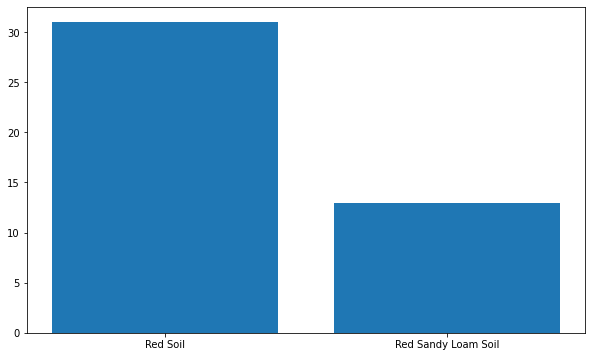

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Topioca  ', 'Topioca, Cashew', 'Paddy', 'Topica, Paddy',
       'Topioca', 'Cashew, Mango', 'Topioca (Sample-2)',
       'Topioca (Sample-1)', 'Paddy (Sample-2)', 'Cotton (Sample-1)',
       'Cotton ', 'Cotton', 'Cotton, Topioca', 'Paddy, Brinjal',
       'Cotton, Redgram', 'Paddy (Sample-1)'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy                 21
Topioca                4
Cotton                 4
Cotton (Sample-1)      2
Paddy (Sample-2)       2
Topioca (Sample-1)     1
Topioca                1
Topioca (Sample-2)     1
Cashew, Mango          1
Cotton                 1
Cotton, Redgram        1
Topioca, Cashew        1
Cotton, Topioca        1
Paddy (Sample-1)       1
Topica, Paddy          1
Paddy, Brinjal         1
Name: Crop, dtype: int64

Paddy      25
Cotton      8
Tapioca     8
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

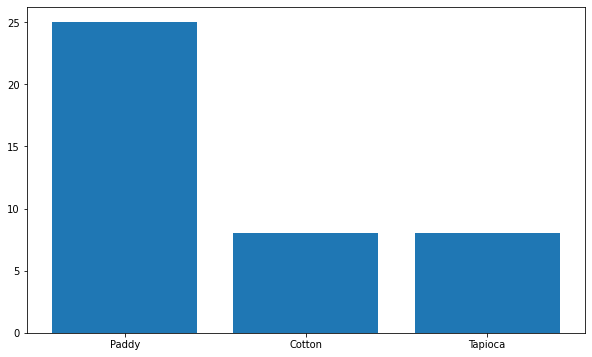

In [15]:
df['Crop'] = df['Crop'].replace(['Cotton (Sample-1)', 'Cotton ', 'Cotton', 'Cotton, Redgram'], 'Cotton')
df['Crop'] = df['Crop'].replace(['Paddy, Brinjal', 'Paddy (Sample-1)', 'Paddy (Sample-2)'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Topioca', 'Topioca, Cashew', 'Topioca  ', 'Topioca (Sample-2)', 'Topioca (Sample-1)'], 'Tapioca')
df = df[(df['Crop'] != 'Topica, Paddy') & (df['Crop'] != 'Cashew, Mango') & (df['Crop'] != 'Cotton, Topioca')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.350693,0.241096,0.127105,0.148829,0.695071,0.591943,0.188963,0.042814,0.043501,-0.141149,0.161902,-0.556459,0.249093
EC,0.350693,1.000000,0.564192,0.163832,0.433282,0.563984,0.397651,0.758502,0.222021,0.528984,-0.033599,0.214563,-0.015411,0.160511
OC,0.241096,0.564192,1.000000,0.296454,0.379856,0.282452,0.266818,0.508410,0.518181,0.539134,0.427353,0.611589,-0.016304,0.215184
P,0.127105,0.163832,0.296454,1.000000,0.236829,0.020361,0.018558,-0.066209,0.878455,0.076579,0.663295,0.462322,-0.154802,0.227445
K,0.148829,0.433282,0.379856,0.236829,1.000000,0.112563,0.267932,0.095924,0.260360,0.464705,-0.060808,-0.074361,0.070945,0.165615
Ca,0.695071,0.563984,0.282452,0.020361,0.112563,1.000000,0.766683,0.346891,-0.021570,0.273129,-0.143852,0.181346,-0.369081,0.027904
Mg,0.591943,0.397651,0.266818,0.018558,0.267932,0.766683,1.000000,0.201328,0.075967,0.373499,-0.086178,0.273140,-0.210540,-0.132389
S,0.188963,0.758502,0.508410,-0.066209,0.095924,0.346891,0.201328,1.000000,0.042084,0.389747,0.068553,0.338286,-0.088672,0.298111
Zn,0.042814,0.222021,0.518181,0.878455,0.260360,-0.021570,0.075967,0.042084,1.000000,0.185091,0.819179,0.623415,-0.016939,0.227704
B,0.043501,0.528984,0.539134,0.076579,0.464705,0.273129,0.373499,0.389747,0.185091,1.000000,0.081734,0.277509,0.175012,0.114548


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Mn', 'GCI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC     P      K     Mn       GCI  Red Sandy Loam Soil  Red Soil
611  5.72  0.05  1.24  128.0  48.43  0.104427                    0         1
611    Tapioca
Name: Crop, dtype: object


In [23]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:6] = sc.fit_transform(X[:, 0:6])

In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [25]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [26]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [27]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [28]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [29]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7368421052631579


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 59.00 %
Standard Deviation: 19.04 %


# Decision Tree Classifier

In [32]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6842105263157895


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 69.33 %
Standard Deviation: 17.18 %


# Random Forest Classifier

In [36]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8421052631578947


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.00 %
Standard Deviation: 16.07 %


In [40]:
# pickle.dump(clf3_3, open('EG_model.pkl', 'wb'))
# pickle.dump(sc2, open('EG_scaler.pkl', 'wb'))

# XGBoost

In [41]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [42]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [43]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.8392857142857143
Testing Accuracy:  0.631578947368421


In [44]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [45]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 65.67 %
Standard Deviation: 15.35 %


In [46]:
# pickle.dump(clf4_4, open('Anantapur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Anantapur_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [47]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [48]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [49]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9107142857142857
Testing Accuracy:  0.8421052631578947


In [50]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 62.00 %
Standard Deviation: 15.14 %


# Catboost

In [51]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.9791713	total: 153ms	remaining: 15.1s
1:	learn: 0.8715168	total: 154ms	remaining: 7.56s
2:	learn: 0.8015234	total: 156ms	remaining: 5.04s
3:	learn: 0.7706574	total: 157ms	remaining: 3.77s
4:	learn: 0.6442590	total: 159ms	remaining: 3.01s
5:	learn: 0.5909695	total: 160ms	remaining: 2.51s
6:	learn: 0.5387442	total: 161ms	remaining: 2.14s
7:	learn: 0.4785571	total: 163ms	remaining: 1.87s
8:	learn: 0.4198198	total: 164ms	remaining: 1.66s
9:	learn: 0.3689900	total: 166ms	remaining: 1.49s
10:	learn: 0.3409149	total: 167ms	remaining: 1.35s
11:	learn: 0.3299295	total: 168ms	remaining: 1.23s
12:	learn: 0.2981323	total: 169ms	remaining: 1.13s
13:	learn: 0.2681788	total: 169ms	remaining: 1.04s
14:	learn: 0.2593375	total: 170ms	remaining: 964ms
15:	learn: 0.2436137	total: 171ms	remaining: 897ms
16:	learn: 0.2305409	total: 172ms	remaining: 838ms
17:	learn: 0.2225013	total: 172ms	remaining: 785ms
18:	learn: 0.2055199	total: 173ms	remaining: 738ms
19:	learn: 0.2008221	total: 174ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.004105085
bestIteration = 93

Training on fold [1/5]

bestTest = 0.8972172383
bestIteration = 99

Training on fold [2/5]

bestTest = 0.9562731737
bestIteration = 98

Training on fold [3/5]

bestTest = 1.007639902
bestIteration = 76

Training on fold [4/5]

bestTest = 0.871200522
bestIteration = 97



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0910007	test: 1.0942912	best: 1.0942912 (0)	total: 540us	remaining: 540ms
1:	learn: 1.0847154	test: 1.0898967	best: 1.0898967 (1)	total: 1.2ms	remaining: 599ms
2:	learn: 1.0752015	test: 1.0846460	best: 1.0846460 (2)	total: 1.7ms	remaining: 566ms
3:	learn: 1.0704054	test: 1.0848981	best: 1.0846460 (2)	total: 2.28ms	remaining: 569ms
4:	learn: 1.0612416	test: 1.0754072	best: 1.0754072 (4)	total: 2.84ms	remaining: 566ms
5:	learn: 1.0515565	test: 1.0713519	best: 1.0713519 (5)	total: 3.39ms	remaining: 562ms
6:	learn: 1.0460248	test: 1.0687015	best: 1.0687015 (6)	total: 4.08ms	remaining: 579ms
7:	learn: 1.0384822	test: 1.0656300	best: 1.0656300 (7)	total: 4.62ms	remaining: 573ms
8:	learn: 1.0309124	test: 1.0572427	best: 1.0572427 (8)	total: 5.15ms	remaining: 567ms
9:	learn: 1.0233876	test: 1.0572696	best: 1.0572427 (8)	total: 5.63ms	remaining: 558ms
10:	learn: 1.0207536	test: 1.0563553	best: 1.0563553 (10)	total: 6.13ms	remaining: 551ms
11:	learn: 1.0157915	test: 1.0549763	best: 1

310:	learn: 0.2571001	test: 0.4597425	best: 0.4597425 (310)	total: 165ms	remaining: 365ms
311:	learn: 0.2562673	test: 0.4595252	best: 0.4595252 (311)	total: 166ms	remaining: 365ms
312:	learn: 0.2553680	test: 0.4582314	best: 0.4582314 (312)	total: 166ms	remaining: 364ms
313:	learn: 0.2544688	test: 0.4572538	best: 0.4572538 (313)	total: 167ms	remaining: 364ms
314:	learn: 0.2531592	test: 0.4554116	best: 0.4554116 (314)	total: 167ms	remaining: 363ms
315:	learn: 0.2522686	test: 0.4551392	best: 0.4551392 (315)	total: 168ms	remaining: 363ms
316:	learn: 0.2513643	test: 0.4540800	best: 0.4540800 (316)	total: 168ms	remaining: 362ms
317:	learn: 0.2505021	test: 0.4533336	best: 0.4533336 (317)	total: 169ms	remaining: 362ms
318:	learn: 0.2495942	test: 0.4528056	best: 0.4528056 (318)	total: 169ms	remaining: 361ms
319:	learn: 0.2485705	test: 0.4515791	best: 0.4515791 (319)	total: 170ms	remaining: 361ms
320:	learn: 0.2475211	test: 0.4508505	best: 0.4508505 (320)	total: 170ms	remaining: 360ms
321:	learn

635:	learn: 0.1083050	test: 0.3005929	best: 0.3005929 (635)	total: 330ms	remaining: 189ms
636:	learn: 0.1080779	test: 0.3006817	best: 0.3005929 (635)	total: 330ms	remaining: 188ms
637:	learn: 0.1078868	test: 0.3003203	best: 0.3003203 (637)	total: 331ms	remaining: 188ms
638:	learn: 0.1076976	test: 0.3000555	best: 0.3000555 (638)	total: 331ms	remaining: 187ms
639:	learn: 0.1075371	test: 0.3000624	best: 0.3000555 (638)	total: 332ms	remaining: 187ms
640:	learn: 0.1071943	test: 0.2997121	best: 0.2997121 (640)	total: 332ms	remaining: 186ms
641:	learn: 0.1071152	test: 0.2996374	best: 0.2996374 (641)	total: 333ms	remaining: 186ms
642:	learn: 0.1068306	test: 0.2995471	best: 0.2995471 (642)	total: 333ms	remaining: 185ms
643:	learn: 0.1067189	test: 0.2997042	best: 0.2995471 (642)	total: 334ms	remaining: 185ms
644:	learn: 0.1065459	test: 0.2996152	best: 0.2995471 (642)	total: 334ms	remaining: 184ms
645:	learn: 0.1063294	test: 0.2995776	best: 0.2995471 (642)	total: 335ms	remaining: 184ms
646:	learn

928:	learn: 0.0672100	test: 0.2424485	best: 0.2424485 (928)	total: 487ms	remaining: 37.3ms
929:	learn: 0.0671131	test: 0.2424797	best: 0.2424485 (928)	total: 488ms	remaining: 36.7ms
930:	learn: 0.0670404	test: 0.2422672	best: 0.2422672 (930)	total: 489ms	remaining: 36.2ms
931:	learn: 0.0669466	test: 0.2420347	best: 0.2420347 (931)	total: 489ms	remaining: 35.7ms
932:	learn: 0.0668327	test: 0.2417747	best: 0.2417747 (932)	total: 490ms	remaining: 35.2ms
933:	learn: 0.0667176	test: 0.2418587	best: 0.2417747 (932)	total: 491ms	remaining: 34.7ms
934:	learn: 0.0666681	test: 0.2417616	best: 0.2417616 (934)	total: 491ms	remaining: 34.1ms
935:	learn: 0.0665548	test: 0.2416296	best: 0.2416296 (935)	total: 492ms	remaining: 33.6ms
936:	learn: 0.0664962	test: 0.2416264	best: 0.2416264 (936)	total: 492ms	remaining: 33.1ms
937:	learn: 0.0664148	test: 0.2413948	best: 0.2413948 (937)	total: 493ms	remaining: 32.6ms
938:	learn: 0.0662689	test: 0.2411038	best: 0.2411038 (938)	total: 493ms	remaining: 32ms
9

185:	learn: 0.1060733	test: 0.3393157	best: 0.3393157 (185)	total: 100ms	remaining: 439ms
186:	learn: 0.1056095	test: 0.3392037	best: 0.3392037 (186)	total: 101ms	remaining: 440ms
187:	learn: 0.1051595	test: 0.3399618	best: 0.3392037 (186)	total: 102ms	remaining: 439ms
188:	learn: 0.1040442	test: 0.3379779	best: 0.3379779 (188)	total: 102ms	remaining: 439ms
189:	learn: 0.1033965	test: 0.3368293	best: 0.3368293 (189)	total: 103ms	remaining: 438ms
190:	learn: 0.1027048	test: 0.3364954	best: 0.3364954 (190)	total: 103ms	remaining: 438ms
191:	learn: 0.1024555	test: 0.3370121	best: 0.3364954 (190)	total: 104ms	remaining: 437ms
192:	learn: 0.1016264	test: 0.3362974	best: 0.3362974 (192)	total: 104ms	remaining: 436ms
193:	learn: 0.1013089	test: 0.3357481	best: 0.3357481 (193)	total: 105ms	remaining: 436ms
194:	learn: 0.1007802	test: 0.3343104	best: 0.3343104 (194)	total: 105ms	remaining: 435ms
195:	learn: 0.1003173	test: 0.3326826	best: 0.3326826 (195)	total: 106ms	remaining: 434ms
196:	learn

285:	learn: 0.0630645	test: 0.2743601	best: 0.2743601 (285)	total: 154ms	remaining: 384ms
286:	learn: 0.0627484	test: 0.2738633	best: 0.2738633 (286)	total: 154ms	remaining: 384ms
287:	learn: 0.0624443	test: 0.2730040	best: 0.2730040 (287)	total: 155ms	remaining: 383ms
288:	learn: 0.0621623	test: 0.2720243	best: 0.2720243 (288)	total: 155ms	remaining: 383ms
289:	learn: 0.0618700	test: 0.2715121	best: 0.2715121 (289)	total: 156ms	remaining: 382ms
290:	learn: 0.0616677	test: 0.2714557	best: 0.2714557 (290)	total: 157ms	remaining: 381ms
291:	learn: 0.0614148	test: 0.2711492	best: 0.2711492 (291)	total: 157ms	remaining: 382ms
292:	learn: 0.0610608	test: 0.2714386	best: 0.2711492 (291)	total: 158ms	remaining: 381ms
293:	learn: 0.0607359	test: 0.2707070	best: 0.2707070 (293)	total: 159ms	remaining: 381ms
294:	learn: 0.0605091	test: 0.2704076	best: 0.2704076 (294)	total: 159ms	remaining: 380ms
295:	learn: 0.0602814	test: 0.2698940	best: 0.2698940 (295)	total: 160ms	remaining: 380ms
296:	learn

516:	learn: 0.0300987	test: 0.1954952	best: 0.1953712 (515)	total: 272ms	remaining: 254ms
517:	learn: 0.0300326	test: 0.1955903	best: 0.1953712 (515)	total: 273ms	remaining: 254ms
518:	learn: 0.0299858	test: 0.1953339	best: 0.1953339 (518)	total: 273ms	remaining: 253ms
519:	learn: 0.0299270	test: 0.1952381	best: 0.1952381 (519)	total: 273ms	remaining: 252ms
520:	learn: 0.0298357	test: 0.1952155	best: 0.1952155 (520)	total: 274ms	remaining: 252ms
521:	learn: 0.0297574	test: 0.1950281	best: 0.1950281 (521)	total: 275ms	remaining: 252ms
522:	learn: 0.0296762	test: 0.1946641	best: 0.1946641 (522)	total: 275ms	remaining: 251ms
523:	learn: 0.0296345	test: 0.1946971	best: 0.1946641 (522)	total: 276ms	remaining: 251ms
524:	learn: 0.0295561	test: 0.1943666	best: 0.1943666 (524)	total: 276ms	remaining: 250ms
525:	learn: 0.0294993	test: 0.1943378	best: 0.1943378 (525)	total: 277ms	remaining: 249ms
526:	learn: 0.0294241	test: 0.1938855	best: 0.1938855 (526)	total: 277ms	remaining: 249ms
527:	learn

619:	learn: 0.0242621	test: 0.1801072	best: 0.1801072 (619)	total: 326ms	remaining: 200ms
620:	learn: 0.0242311	test: 0.1799782	best: 0.1799782 (620)	total: 327ms	remaining: 200ms
621:	learn: 0.0242107	test: 0.1800722	best: 0.1799782 (620)	total: 328ms	remaining: 199ms
622:	learn: 0.0241616	test: 0.1799889	best: 0.1799782 (620)	total: 328ms	remaining: 199ms
623:	learn: 0.0241155	test: 0.1801078	best: 0.1799782 (620)	total: 329ms	remaining: 198ms
624:	learn: 0.0240774	test: 0.1800632	best: 0.1799782 (620)	total: 329ms	remaining: 198ms
625:	learn: 0.0240211	test: 0.1800154	best: 0.1799782 (620)	total: 330ms	remaining: 197ms
626:	learn: 0.0239748	test: 0.1796971	best: 0.1796971 (626)	total: 331ms	remaining: 197ms
627:	learn: 0.0239413	test: 0.1795410	best: 0.1795410 (627)	total: 331ms	remaining: 196ms
628:	learn: 0.0238967	test: 0.1793821	best: 0.1793821 (628)	total: 332ms	remaining: 196ms
629:	learn: 0.0238583	test: 0.1794748	best: 0.1793821 (628)	total: 332ms	remaining: 195ms
630:	learn

818:	learn: 0.0175498	test: 0.1565683	best: 0.1564416 (816)	total: 432ms	remaining: 95.6ms
819:	learn: 0.0175336	test: 0.1566295	best: 0.1564416 (816)	total: 433ms	remaining: 95ms
820:	learn: 0.0175124	test: 0.1564766	best: 0.1564416 (816)	total: 434ms	remaining: 94.5ms
821:	learn: 0.0174949	test: 0.1563796	best: 0.1563796 (821)	total: 434ms	remaining: 94ms
822:	learn: 0.0174815	test: 0.1563937	best: 0.1563796 (821)	total: 435ms	remaining: 93.5ms
823:	learn: 0.0174599	test: 0.1562772	best: 0.1562772 (823)	total: 435ms	remaining: 93ms
824:	learn: 0.0174317	test: 0.1561154	best: 0.1561154 (824)	total: 436ms	remaining: 92.4ms
825:	learn: 0.0174100	test: 0.1559538	best: 0.1559538 (825)	total: 436ms	remaining: 91.9ms
826:	learn: 0.0173846	test: 0.1560765	best: 0.1559538 (825)	total: 437ms	remaining: 91.4ms
827:	learn: 0.0173656	test: 0.1560630	best: 0.1559538 (825)	total: 437ms	remaining: 90.9ms
828:	learn: 0.0173351	test: 0.1558138	best: 0.1558138 (828)	total: 438ms	remaining: 90.3ms
829:	

924:	learn: 0.0152974	test: 0.1485255	best: 0.1485255 (924)	total: 487ms	remaining: 39.5ms
925:	learn: 0.0152843	test: 0.1485229	best: 0.1485229 (925)	total: 488ms	remaining: 39ms
926:	learn: 0.0152738	test: 0.1485313	best: 0.1485229 (925)	total: 489ms	remaining: 38.5ms
927:	learn: 0.0152548	test: 0.1486070	best: 0.1485229 (925)	total: 489ms	remaining: 37.9ms
928:	learn: 0.0152476	test: 0.1486676	best: 0.1485229 (925)	total: 490ms	remaining: 37.4ms
929:	learn: 0.0152325	test: 0.1485873	best: 0.1485229 (925)	total: 490ms	remaining: 36.9ms
930:	learn: 0.0152042	test: 0.1484549	best: 0.1484549 (930)	total: 491ms	remaining: 36.4ms
931:	learn: 0.0151920	test: 0.1483064	best: 0.1483064 (931)	total: 492ms	remaining: 35.9ms
932:	learn: 0.0151739	test: 0.1481975	best: 0.1481975 (932)	total: 493ms	remaining: 35.4ms
933:	learn: 0.0151604	test: 0.1482918	best: 0.1481975 (932)	total: 493ms	remaining: 34.8ms
934:	learn: 0.0151291	test: 0.1480871	best: 0.1480871 (934)	total: 494ms	remaining: 34.3ms
9

74:	learn: 0.6936213	test: 0.8915751	best: 0.8915751 (74)	total: 62.5ms	remaining: 771ms
75:	learn: 0.6897487	test: 0.8882442	best: 0.8882442 (75)	total: 63.5ms	remaining: 772ms
76:	learn: 0.6862214	test: 0.8857198	best: 0.8857198 (76)	total: 64.4ms	remaining: 772ms
77:	learn: 0.6828132	test: 0.8846536	best: 0.8846536 (77)	total: 65.4ms	remaining: 773ms
78:	learn: 0.6790450	test: 0.8814660	best: 0.8814660 (78)	total: 66.4ms	remaining: 774ms
79:	learn: 0.6749889	test: 0.8811740	best: 0.8811740 (79)	total: 67.3ms	remaining: 773ms
80:	learn: 0.6708806	test: 0.8783194	best: 0.8783194 (80)	total: 68.1ms	remaining: 773ms
81:	learn: 0.6676757	test: 0.8778879	best: 0.8778879 (81)	total: 69ms	remaining: 773ms
82:	learn: 0.6656422	test: 0.8779247	best: 0.8778879 (81)	total: 69.9ms	remaining: 772ms
83:	learn: 0.6623787	test: 0.8789058	best: 0.8778879 (81)	total: 70.8ms	remaining: 772ms
84:	learn: 0.6588310	test: 0.8787130	best: 0.8778879 (81)	total: 71.7ms	remaining: 772ms
85:	learn: 0.6566179	te

274:	learn: 0.2550218	test: 0.5544427	best: 0.5544427 (274)	total: 238ms	remaining: 627ms
275:	learn: 0.2534599	test: 0.5519583	best: 0.5519583 (275)	total: 239ms	remaining: 626ms
276:	learn: 0.2523102	test: 0.5509335	best: 0.5509335 (276)	total: 240ms	remaining: 626ms
277:	learn: 0.2513790	test: 0.5494244	best: 0.5494244 (277)	total: 241ms	remaining: 625ms
278:	learn: 0.2502045	test: 0.5482937	best: 0.5482937 (278)	total: 242ms	remaining: 625ms
279:	learn: 0.2492176	test: 0.5467607	best: 0.5467607 (279)	total: 243ms	remaining: 624ms
280:	learn: 0.2477925	test: 0.5456714	best: 0.5456714 (280)	total: 244ms	remaining: 623ms
281:	learn: 0.2467796	test: 0.5446517	best: 0.5446517 (281)	total: 245ms	remaining: 623ms
282:	learn: 0.2457469	test: 0.5434385	best: 0.5434385 (282)	total: 246ms	remaining: 622ms
283:	learn: 0.2447265	test: 0.5424457	best: 0.5424457 (283)	total: 247ms	remaining: 622ms
284:	learn: 0.2434982	test: 0.5401852	best: 0.5401852 (284)	total: 248ms	remaining: 621ms
285:	learn

449:	learn: 0.1356386	test: 0.4083568	best: 0.4083568 (449)	total: 402ms	remaining: 492ms
450:	learn: 0.1351430	test: 0.4069902	best: 0.4069902 (450)	total: 403ms	remaining: 491ms
451:	learn: 0.1348279	test: 0.4067832	best: 0.4067832 (451)	total: 404ms	remaining: 490ms
452:	learn: 0.1344527	test: 0.4062060	best: 0.4062060 (452)	total: 405ms	remaining: 489ms
453:	learn: 0.1340737	test: 0.4057209	best: 0.4057209 (453)	total: 406ms	remaining: 489ms
454:	learn: 0.1336050	test: 0.4051931	best: 0.4051931 (454)	total: 407ms	remaining: 488ms
455:	learn: 0.1332721	test: 0.4046509	best: 0.4046509 (455)	total: 408ms	remaining: 487ms
456:	learn: 0.1328974	test: 0.4045163	best: 0.4045163 (456)	total: 409ms	remaining: 486ms
457:	learn: 0.1325783	test: 0.4039190	best: 0.4039190 (457)	total: 410ms	remaining: 485ms
458:	learn: 0.1321719	test: 0.4034762	best: 0.4034762 (458)	total: 411ms	remaining: 484ms
459:	learn: 0.1316384	test: 0.4025592	best: 0.4025592 (459)	total: 412ms	remaining: 483ms
460:	learn

646:	learn: 0.0848564	test: 0.3307343	best: 0.3307343 (646)	total: 581ms	remaining: 317ms
647:	learn: 0.0847177	test: 0.3303898	best: 0.3303898 (647)	total: 582ms	remaining: 316ms
648:	learn: 0.0845495	test: 0.3302807	best: 0.3302807 (648)	total: 583ms	remaining: 315ms
649:	learn: 0.0843583	test: 0.3298806	best: 0.3298806 (649)	total: 584ms	remaining: 314ms
650:	learn: 0.0842102	test: 0.3297177	best: 0.3297177 (650)	total: 585ms	remaining: 313ms
651:	learn: 0.0840460	test: 0.3294811	best: 0.3294811 (651)	total: 586ms	remaining: 313ms
652:	learn: 0.0839093	test: 0.3292123	best: 0.3292123 (652)	total: 586ms	remaining: 312ms
653:	learn: 0.0836991	test: 0.3287183	best: 0.3287183 (653)	total: 587ms	remaining: 311ms
654:	learn: 0.0835708	test: 0.3285446	best: 0.3285446 (654)	total: 588ms	remaining: 310ms
655:	learn: 0.0834105	test: 0.3282758	best: 0.3282758 (655)	total: 589ms	remaining: 309ms
656:	learn: 0.0832686	test: 0.3279001	best: 0.3279001 (656)	total: 590ms	remaining: 308ms
657:	learn

832:	learn: 0.0617345	test: 0.2852502	best: 0.2852502 (832)	total: 747ms	remaining: 150ms
833:	learn: 0.0616231	test: 0.2850462	best: 0.2850462 (833)	total: 748ms	remaining: 149ms
834:	learn: 0.0615109	test: 0.2847343	best: 0.2847343 (834)	total: 749ms	remaining: 148ms
835:	learn: 0.0614037	test: 0.2847477	best: 0.2847343 (834)	total: 750ms	remaining: 147ms
836:	learn: 0.0613060	test: 0.2845736	best: 0.2845736 (836)	total: 751ms	remaining: 146ms
837:	learn: 0.0612189	test: 0.2843259	best: 0.2843259 (837)	total: 752ms	remaining: 145ms
838:	learn: 0.0611228	test: 0.2842330	best: 0.2842330 (838)	total: 753ms	remaining: 144ms
839:	learn: 0.0610387	test: 0.2839921	best: 0.2839921 (839)	total: 754ms	remaining: 144ms
840:	learn: 0.0609617	test: 0.2838487	best: 0.2838487 (840)	total: 754ms	remaining: 143ms
841:	learn: 0.0608746	test: 0.2835886	best: 0.2835886 (841)	total: 755ms	remaining: 142ms
842:	learn: 0.0607640	test: 0.2834723	best: 0.2834723 (842)	total: 756ms	remaining: 141ms
843:	learn

19:	learn: 0.7389292	test: 0.9365178	best: 0.9365178 (19)	total: 28.3ms	remaining: 1.39s
20:	learn: 0.7257877	test: 0.9255320	best: 0.9255320 (20)	total: 29.2ms	remaining: 1.36s
21:	learn: 0.7117640	test: 0.9204922	best: 0.9204922 (21)	total: 30.1ms	remaining: 1.34s
22:	learn: 0.7016707	test: 0.9157410	best: 0.9157410 (22)	total: 31ms	remaining: 1.32s
23:	learn: 0.6908457	test: 0.9069931	best: 0.9069931 (23)	total: 32ms	remaining: 1.3s
24:	learn: 0.6786131	test: 0.9053405	best: 0.9053405 (24)	total: 32.8ms	remaining: 1.28s
25:	learn: 0.6682718	test: 0.9012623	best: 0.9012623 (25)	total: 33.6ms	remaining: 1.26s
26:	learn: 0.6575140	test: 0.8859304	best: 0.8859304 (26)	total: 34.4ms	remaining: 1.24s
27:	learn: 0.6450525	test: 0.8775536	best: 0.8775536 (27)	total: 35.1ms	remaining: 1.22s
28:	learn: 0.6319151	test: 0.8743439	best: 0.8743439 (28)	total: 35.9ms	remaining: 1.2s
29:	learn: 0.6230809	test: 0.8703099	best: 0.8703099 (29)	total: 36.7ms	remaining: 1.19s
30:	learn: 0.6099881	test: 

211:	learn: 0.0773754	test: 0.3159625	best: 0.3159625 (211)	total: 192ms	remaining: 713ms
212:	learn: 0.0768891	test: 0.3143281	best: 0.3143281 (212)	total: 193ms	remaining: 713ms
213:	learn: 0.0764441	test: 0.3142053	best: 0.3142053 (213)	total: 194ms	remaining: 712ms
214:	learn: 0.0761002	test: 0.3137448	best: 0.3137448 (214)	total: 195ms	remaining: 711ms
215:	learn: 0.0756722	test: 0.3130014	best: 0.3130014 (215)	total: 196ms	remaining: 710ms
216:	learn: 0.0750008	test: 0.3115416	best: 0.3115416 (216)	total: 197ms	remaining: 710ms
217:	learn: 0.0746126	test: 0.3105149	best: 0.3105149 (217)	total: 198ms	remaining: 710ms
218:	learn: 0.0741119	test: 0.3101349	best: 0.3101349 (218)	total: 199ms	remaining: 709ms
219:	learn: 0.0738184	test: 0.3099346	best: 0.3099346 (219)	total: 200ms	remaining: 708ms
220:	learn: 0.0734090	test: 0.3092880	best: 0.3092880 (220)	total: 201ms	remaining: 707ms
221:	learn: 0.0730540	test: 0.3095063	best: 0.3092880 (220)	total: 201ms	remaining: 706ms
222:	learn

407:	learn: 0.0341280	test: 0.2218123	best: 0.2218123 (407)	total: 365ms	remaining: 530ms
408:	learn: 0.0340384	test: 0.2216526	best: 0.2216526 (408)	total: 366ms	remaining: 529ms
409:	learn: 0.0339344	test: 0.2214631	best: 0.2214631 (409)	total: 367ms	remaining: 528ms
410:	learn: 0.0338377	test: 0.2211920	best: 0.2211920 (410)	total: 368ms	remaining: 528ms
411:	learn: 0.0337393	test: 0.2207655	best: 0.2207655 (411)	total: 369ms	remaining: 527ms
412:	learn: 0.0336559	test: 0.2204782	best: 0.2204782 (412)	total: 370ms	remaining: 526ms
413:	learn: 0.0335658	test: 0.2200830	best: 0.2200830 (413)	total: 371ms	remaining: 525ms
414:	learn: 0.0334875	test: 0.2199524	best: 0.2199524 (414)	total: 372ms	remaining: 524ms
415:	learn: 0.0333897	test: 0.2195566	best: 0.2195566 (415)	total: 373ms	remaining: 523ms
416:	learn: 0.0332852	test: 0.2191654	best: 0.2191654 (416)	total: 374ms	remaining: 522ms
417:	learn: 0.0331863	test: 0.2191727	best: 0.2191654 (416)	total: 375ms	remaining: 522ms
418:	learn

591:	learn: 0.0219642	test: 0.1831466	best: 0.1831466 (591)	total: 528ms	remaining: 364ms
592:	learn: 0.0219231	test: 0.1829384	best: 0.1829384 (592)	total: 529ms	remaining: 363ms
593:	learn: 0.0218842	test: 0.1827275	best: 0.1827275 (593)	total: 530ms	remaining: 362ms
594:	learn: 0.0218428	test: 0.1826457	best: 0.1826457 (594)	total: 531ms	remaining: 361ms
595:	learn: 0.0217914	test: 0.1823939	best: 0.1823939 (595)	total: 532ms	remaining: 361ms
596:	learn: 0.0217179	test: 0.1824496	best: 0.1823939 (595)	total: 533ms	remaining: 360ms
597:	learn: 0.0216679	test: 0.1823070	best: 0.1823070 (597)	total: 534ms	remaining: 359ms
598:	learn: 0.0216162	test: 0.1821455	best: 0.1821455 (598)	total: 534ms	remaining: 358ms
599:	learn: 0.0215718	test: 0.1818797	best: 0.1818797 (599)	total: 535ms	remaining: 357ms
600:	learn: 0.0215386	test: 0.1817514	best: 0.1817514 (600)	total: 536ms	remaining: 356ms
601:	learn: 0.0215064	test: 0.1816498	best: 0.1816498 (601)	total: 537ms	remaining: 355ms
602:	learn

799:	learn: 0.0155253	test: 0.1565942	best: 0.1565942 (799)	total: 707ms	remaining: 177ms
800:	learn: 0.0155014	test: 0.1565118	best: 0.1565118 (800)	total: 708ms	remaining: 176ms
801:	learn: 0.0154819	test: 0.1564952	best: 0.1564952 (801)	total: 709ms	remaining: 175ms
802:	learn: 0.0154580	test: 0.1562168	best: 0.1562168 (802)	total: 710ms	remaining: 174ms
803:	learn: 0.0154385	test: 0.1560750	best: 0.1560750 (803)	total: 711ms	remaining: 173ms
804:	learn: 0.0154129	test: 0.1558368	best: 0.1558368 (804)	total: 712ms	remaining: 172ms
805:	learn: 0.0153915	test: 0.1557333	best: 0.1557333 (805)	total: 712ms	remaining: 171ms
806:	learn: 0.0153688	test: 0.1556022	best: 0.1556022 (806)	total: 713ms	remaining: 171ms
807:	learn: 0.0153491	test: 0.1554784	best: 0.1554784 (807)	total: 714ms	remaining: 170ms
808:	learn: 0.0153255	test: 0.1553694	best: 0.1553694 (808)	total: 715ms	remaining: 169ms
809:	learn: 0.0153081	test: 0.1552579	best: 0.1552579 (809)	total: 716ms	remaining: 168ms
810:	learn

993:	learn: 0.0122122	test: 0.1416892	best: 0.1416892 (993)	total: 880ms	remaining: 5.31ms
994:	learn: 0.0121986	test: 0.1416129	best: 0.1416129 (994)	total: 881ms	remaining: 4.42ms
995:	learn: 0.0121818	test: 0.1415823	best: 0.1415823 (995)	total: 882ms	remaining: 3.54ms
996:	learn: 0.0121705	test: 0.1415100	best: 0.1415100 (996)	total: 883ms	remaining: 2.65ms
997:	learn: 0.0121584	test: 0.1414143	best: 0.1414143 (997)	total: 884ms	remaining: 1.77ms
998:	learn: 0.0121463	test: 0.1413468	best: 0.1413468 (998)	total: 885ms	remaining: 885us
999:	learn: 0.0121351	test: 0.1412197	best: 0.1412197 (999)	total: 885ms	remaining: 0us

bestTest = 0.1412196684
bestIteration = 999

3:	loss: 0.1412197	best: 0.1412197 (3)	total: 3.2s	remaining: 1.6s
0:	learn: 1.0910007	test: 1.0942912	best: 1.0942912 (0)	total: 611us	remaining: 611ms
1:	learn: 1.0843610	test: 1.0917712	best: 1.0917712 (1)	total: 3.69ms	remaining: 1.84s
2:	learn: 1.0778839	test: 1.0883186	best: 1.0883186 (2)	total: 15.8ms	remaining: 

98:	learn: 0.6076411	test: 0.8801065	best: 0.8801065 (98)	total: 771ms	remaining: 7.01s
99:	learn: 0.6042733	test: 0.8782030	best: 0.8782030 (99)	total: 776ms	remaining: 6.98s
100:	learn: 0.6003561	test: 0.8778427	best: 0.8778427 (100)	total: 779ms	remaining: 6.93s
101:	learn: 0.5971175	test: 0.8748784	best: 0.8748784 (101)	total: 786ms	remaining: 6.92s
102:	learn: 0.5938812	test: 0.8726394	best: 0.8726394 (102)	total: 798ms	remaining: 6.95s
103:	learn: 0.5906221	test: 0.8711152	best: 0.8711152 (103)	total: 801ms	remaining: 6.9s
104:	learn: 0.5876272	test: 0.8681600	best: 0.8681600 (104)	total: 815ms	remaining: 6.95s
105:	learn: 0.5846631	test: 0.8665638	best: 0.8665638 (105)	total: 816ms	remaining: 6.89s
106:	learn: 0.5817455	test: 0.8639645	best: 0.8639645 (106)	total: 828ms	remaining: 6.91s
107:	learn: 0.5787289	test: 0.8631070	best: 0.8631070 (107)	total: 840ms	remaining: 6.94s
108:	learn: 0.5756812	test: 0.8616301	best: 0.8616301 (108)	total: 851ms	remaining: 6.96s
109:	learn: 0.5

191:	learn: 0.3784927	test: 0.7346056	best: 0.7346056 (191)	total: 1.51s	remaining: 6.34s
192:	learn: 0.3761021	test: 0.7316488	best: 0.7316488 (192)	total: 1.51s	remaining: 6.32s
193:	learn: 0.3740585	test: 0.7318435	best: 0.7316488 (192)	total: 1.52s	remaining: 6.3s
194:	learn: 0.3721987	test: 0.7304420	best: 0.7304420 (194)	total: 1.53s	remaining: 6.32s
195:	learn: 0.3705319	test: 0.7300584	best: 0.7300584 (195)	total: 1.54s	remaining: 6.32s
196:	learn: 0.3686084	test: 0.7269690	best: 0.7269690 (196)	total: 1.54s	remaining: 6.29s
197:	learn: 0.3669013	test: 0.7264477	best: 0.7264477 (197)	total: 1.55s	remaining: 6.29s
198:	learn: 0.3648411	test: 0.7237086	best: 0.7237086 (198)	total: 1.56s	remaining: 6.27s
199:	learn: 0.3630239	test: 0.7225426	best: 0.7225426 (199)	total: 1.56s	remaining: 6.26s
200:	learn: 0.3613387	test: 0.7217923	best: 0.7217923 (200)	total: 1.58s	remaining: 6.27s
201:	learn: 0.3595574	test: 0.7201000	best: 0.7201000 (201)	total: 1.59s	remaining: 6.27s
202:	learn:

290:	learn: 0.2377685	test: 0.6054792	best: 0.6054792 (290)	total: 2.3s	remaining: 5.6s
291:	learn: 0.2369778	test: 0.6053824	best: 0.6053824 (291)	total: 2.31s	remaining: 5.6s
292:	learn: 0.2358661	test: 0.6033412	best: 0.6033412 (292)	total: 2.31s	remaining: 5.59s
293:	learn: 0.2350533	test: 0.6017651	best: 0.6017651 (293)	total: 2.32s	remaining: 5.57s
294:	learn: 0.2340001	test: 0.6007571	best: 0.6007571 (294)	total: 2.33s	remaining: 5.58s
295:	learn: 0.2329657	test: 0.5995990	best: 0.5995990 (295)	total: 2.35s	remaining: 5.58s
296:	learn: 0.2321549	test: 0.5992193	best: 0.5992193 (296)	total: 2.35s	remaining: 5.56s
297:	learn: 0.2312277	test: 0.5983623	best: 0.5983623 (297)	total: 2.36s	remaining: 5.56s
298:	learn: 0.2304988	test: 0.5979608	best: 0.5979608 (298)	total: 2.37s	remaining: 5.56s
299:	learn: 0.2296463	test: 0.5974830	best: 0.5974830 (299)	total: 2.38s	remaining: 5.56s
300:	learn: 0.2288272	test: 0.5962103	best: 0.5962103 (300)	total: 2.39s	remaining: 5.54s
301:	learn: 0

387:	learn: 0.1661726	test: 0.5239200	best: 0.5239200 (387)	total: 3.25s	remaining: 5.13s
388:	learn: 0.1656132	test: 0.5230986	best: 0.5230986 (388)	total: 3.27s	remaining: 5.13s
389:	learn: 0.1651415	test: 0.5224338	best: 0.5224338 (389)	total: 3.28s	remaining: 5.13s
390:	learn: 0.1646575	test: 0.5221770	best: 0.5221770 (390)	total: 3.29s	remaining: 5.13s
391:	learn: 0.1641770	test: 0.5217220	best: 0.5217220 (391)	total: 3.3s	remaining: 5.12s
392:	learn: 0.1637640	test: 0.5213565	best: 0.5213565 (392)	total: 3.31s	remaining: 5.12s
393:	learn: 0.1631841	test: 0.5209307	best: 0.5209307 (393)	total: 3.33s	remaining: 5.12s
394:	learn: 0.1626812	test: 0.5201593	best: 0.5201593 (394)	total: 3.34s	remaining: 5.12s
395:	learn: 0.1621387	test: 0.5196092	best: 0.5196092 (395)	total: 3.35s	remaining: 5.11s
396:	learn: 0.1616290	test: 0.5186925	best: 0.5186925 (396)	total: 3.36s	remaining: 5.11s
397:	learn: 0.1611355	test: 0.5179331	best: 0.5179331 (397)	total: 3.36s	remaining: 5.09s
398:	learn:

482:	learn: 0.1261495	test: 0.4727360	best: 0.4727360 (482)	total: 4.24s	remaining: 4.54s
483:	learn: 0.1257747	test: 0.4724482	best: 0.4724482 (483)	total: 4.25s	remaining: 4.53s
484:	learn: 0.1254950	test: 0.4721958	best: 0.4721958 (484)	total: 4.26s	remaining: 4.53s
485:	learn: 0.1252119	test: 0.4717747	best: 0.4717747 (485)	total: 4.28s	remaining: 4.53s
486:	learn: 0.1248667	test: 0.4710886	best: 0.4710886 (486)	total: 4.29s	remaining: 4.52s
487:	learn: 0.1245742	test: 0.4705851	best: 0.4705851 (487)	total: 4.3s	remaining: 4.51s
488:	learn: 0.1242784	test: 0.4698588	best: 0.4698588 (488)	total: 4.3s	remaining: 4.49s
489:	learn: 0.1238939	test: 0.4694703	best: 0.4694703 (489)	total: 4.31s	remaining: 4.49s
490:	learn: 0.1235745	test: 0.4689793	best: 0.4689793 (490)	total: 4.32s	remaining: 4.47s
491:	learn: 0.1232635	test: 0.4687492	best: 0.4687492 (491)	total: 4.32s	remaining: 4.46s
492:	learn: 0.1229677	test: 0.4682510	best: 0.4682510 (492)	total: 4.33s	remaining: 4.46s
493:	learn: 

575:	learn: 0.1013575	test: 0.4380237	best: 0.4380237 (575)	total: 5.24s	remaining: 3.85s
576:	learn: 0.1011476	test: 0.4376651	best: 0.4376651 (576)	total: 5.24s	remaining: 3.84s
577:	learn: 0.1009443	test: 0.4373692	best: 0.4373692 (577)	total: 5.26s	remaining: 3.84s
578:	learn: 0.1007141	test: 0.4369113	best: 0.4369113 (578)	total: 5.27s	remaining: 3.83s
579:	learn: 0.1004873	test: 0.4366347	best: 0.4366347 (579)	total: 5.28s	remaining: 3.83s
580:	learn: 0.1002899	test: 0.4365675	best: 0.4365675 (580)	total: 5.29s	remaining: 3.82s
581:	learn: 0.1001027	test: 0.4363846	best: 0.4363846 (581)	total: 5.31s	remaining: 3.81s
582:	learn: 0.0999323	test: 0.4362546	best: 0.4362546 (582)	total: 5.32s	remaining: 3.8s
583:	learn: 0.0997229	test: 0.4359567	best: 0.4359567 (583)	total: 5.33s	remaining: 3.8s
584:	learn: 0.0995355	test: 0.4356077	best: 0.4356077 (584)	total: 5.34s	remaining: 3.79s
585:	learn: 0.0993426	test: 0.4355183	best: 0.4355183 (585)	total: 5.36s	remaining: 3.78s
586:	learn: 

679:	learn: 0.0823560	test: 0.4070002	best: 0.4070002 (679)	total: 6.44s	remaining: 3.03s
680:	learn: 0.0821990	test: 0.4067902	best: 0.4067902 (680)	total: 6.46s	remaining: 3.02s
681:	learn: 0.0820237	test: 0.4062956	best: 0.4062956 (681)	total: 6.47s	remaining: 3.02s
682:	learn: 0.0818690	test: 0.4058442	best: 0.4058442 (682)	total: 6.47s	remaining: 3s
683:	learn: 0.0816705	test: 0.4053806	best: 0.4053806 (683)	total: 6.49s	remaining: 3s
684:	learn: 0.0815415	test: 0.4052399	best: 0.4052399 (684)	total: 6.5s	remaining: 2.99s
685:	learn: 0.0813954	test: 0.4051042	best: 0.4051042 (685)	total: 6.5s	remaining: 2.98s
686:	learn: 0.0812600	test: 0.4048596	best: 0.4048596 (686)	total: 6.52s	remaining: 2.97s
687:	learn: 0.0811064	test: 0.4045308	best: 0.4045308 (687)	total: 6.52s	remaining: 2.96s
688:	learn: 0.0809639	test: 0.4042587	best: 0.4042587 (688)	total: 6.53s	remaining: 2.95s
689:	learn: 0.0808030	test: 0.4038831	best: 0.4038831 (689)	total: 6.54s	remaining: 2.94s
690:	learn: 0.0806

772:	learn: 0.0702708	test: 0.3855561	best: 0.3855561 (772)	total: 7.45s	remaining: 2.19s
773:	learn: 0.0701476	test: 0.3852015	best: 0.3852015 (773)	total: 7.46s	remaining: 2.18s
774:	learn: 0.0699828	test: 0.3846622	best: 0.3846622 (774)	total: 7.47s	remaining: 2.17s
775:	learn: 0.0698611	test: 0.3842794	best: 0.3842794 (775)	total: 7.48s	remaining: 2.16s
776:	learn: 0.0697160	test: 0.3839229	best: 0.3839229 (776)	total: 7.49s	remaining: 2.15s
777:	learn: 0.0696294	test: 0.3838541	best: 0.3838541 (777)	total: 7.51s	remaining: 2.14s
778:	learn: 0.0695312	test: 0.3834714	best: 0.3834714 (778)	total: 7.52s	remaining: 2.13s
779:	learn: 0.0694232	test: 0.3832177	best: 0.3832177 (779)	total: 7.52s	remaining: 2.12s
780:	learn: 0.0693051	test: 0.3827687	best: 0.3827687 (780)	total: 7.54s	remaining: 2.11s
781:	learn: 0.0692039	test: 0.3827197	best: 0.3827197 (781)	total: 7.55s	remaining: 2.1s
782:	learn: 0.0690958	test: 0.3825328	best: 0.3825328 (782)	total: 7.56s	remaining: 2.09s
783:	learn:

880:	learn: 0.0599143	test: 0.3630189	best: 0.3630189 (880)	total: 8.65s	remaining: 1.17s
881:	learn: 0.0598411	test: 0.3628292	best: 0.3628292 (881)	total: 8.66s	remaining: 1.16s
882:	learn: 0.0597448	test: 0.3626109	best: 0.3626109 (882)	total: 8.67s	remaining: 1.15s
883:	learn: 0.0596592	test: 0.3623412	best: 0.3623412 (883)	total: 8.68s	remaining: 1.14s
884:	learn: 0.0595779	test: 0.3622599	best: 0.3622599 (884)	total: 8.69s	remaining: 1.13s
885:	learn: 0.0595008	test: 0.3621782	best: 0.3621782 (885)	total: 8.7s	remaining: 1.12s
886:	learn: 0.0594260	test: 0.3620086	best: 0.3620086 (886)	total: 8.71s	remaining: 1.11s
887:	learn: 0.0593311	test: 0.3617485	best: 0.3617485 (887)	total: 8.73s	remaining: 1.1s
888:	learn: 0.0592103	test: 0.3612399	best: 0.3612399 (888)	total: 8.74s	remaining: 1.09s
889:	learn: 0.0591338	test: 0.3610819	best: 0.3610819 (889)	total: 8.75s	remaining: 1.08s
890:	learn: 0.0590528	test: 0.3609271	best: 0.3609271 (890)	total: 8.76s	remaining: 1.07s
891:	learn: 

991:	learn: 0.0518034	test: 0.3472940	best: 0.3472940 (991)	total: 9.88s	remaining: 79.7ms
992:	learn: 0.0517324	test: 0.3472054	best: 0.3472054 (992)	total: 9.89s	remaining: 69.7ms
993:	learn: 0.0516644	test: 0.3469865	best: 0.3469865 (993)	total: 9.9s	remaining: 59.8ms
994:	learn: 0.0516000	test: 0.3468461	best: 0.3468461 (994)	total: 9.91s	remaining: 49.8ms
995:	learn: 0.0515377	test: 0.3466227	best: 0.3466227 (995)	total: 9.93s	remaining: 39.9ms
996:	learn: 0.0514817	test: 0.3464793	best: 0.3464793 (996)	total: 9.94s	remaining: 29.9ms
997:	learn: 0.0514052	test: 0.3462138	best: 0.3462138 (997)	total: 9.95s	remaining: 19.9ms
998:	learn: 0.0513473	test: 0.3461018	best: 0.3461018 (998)	total: 9.96s	remaining: 9.97ms
999:	learn: 0.0512835	test: 0.3459891	best: 0.3459891 (999)	total: 9.97s	remaining: 0us

bestTest = 0.345989145
bestIteration = 999

4:	loss: 0.3459891	best: 0.1412197 (3)	total: 13.4s	remaining: 2.67s
0:	learn: 1.0736099	test: 1.0846192	best: 1.0846192 (0)	total: 782us	re

93:	learn: 0.2239860	test: 0.5967167	best: 0.5967167 (93)	total: 888ms	remaining: 8.56s
94:	learn: 0.2208729	test: 0.5944295	best: 0.5944295 (94)	total: 900ms	remaining: 8.57s
95:	learn: 0.2182673	test: 0.5921429	best: 0.5921429 (95)	total: 913ms	remaining: 8.59s
96:	learn: 0.2150472	test: 0.5896619	best: 0.5896619 (96)	total: 925ms	remaining: 8.61s
97:	learn: 0.2116828	test: 0.5841349	best: 0.5841349 (97)	total: 936ms	remaining: 8.62s
98:	learn: 0.2090975	test: 0.5809848	best: 0.5809848 (98)	total: 942ms	remaining: 8.57s
99:	learn: 0.2063535	test: 0.5766365	best: 0.5766365 (99)	total: 954ms	remaining: 8.58s
100:	learn: 0.2037367	test: 0.5750913	best: 0.5750913 (100)	total: 966ms	remaining: 8.6s
101:	learn: 0.2013002	test: 0.5746235	best: 0.5746235 (101)	total: 977ms	remaining: 8.6s
102:	learn: 0.1988641	test: 0.5732502	best: 0.5732502 (102)	total: 989ms	remaining: 8.61s
103:	learn: 0.1965221	test: 0.5720027	best: 0.5720027 (103)	total: 1s	remaining: 8.62s
104:	learn: 0.1940736	test: 0

186:	learn: 0.0919474	test: 0.4279251	best: 0.4279251 (186)	total: 1.87s	remaining: 8.14s
187:	learn: 0.0913330	test: 0.4265308	best: 0.4265308 (187)	total: 1.88s	remaining: 8.14s
188:	learn: 0.0907749	test: 0.4257655	best: 0.4257655 (188)	total: 1.9s	remaining: 8.14s
189:	learn: 0.0900662	test: 0.4235323	best: 0.4235323 (189)	total: 1.91s	remaining: 8.14s
190:	learn: 0.0894694	test: 0.4227433	best: 0.4227433 (190)	total: 1.92s	remaining: 8.15s
191:	learn: 0.0888471	test: 0.4221142	best: 0.4221142 (191)	total: 1.94s	remaining: 8.17s
192:	learn: 0.0883601	test: 0.4213191	best: 0.4213191 (192)	total: 1.95s	remaining: 8.14s
193:	learn: 0.0878855	test: 0.4204052	best: 0.4204052 (193)	total: 1.96s	remaining: 8.15s
194:	learn: 0.0873270	test: 0.4190046	best: 0.4190046 (194)	total: 1.97s	remaining: 8.14s
195:	learn: 0.0867681	test: 0.4181490	best: 0.4181490 (195)	total: 1.99s	remaining: 8.15s
196:	learn: 0.0861469	test: 0.4159652	best: 0.4159652 (196)	total: 2s	remaining: 8.15s
197:	learn: 0.

291:	learn: 0.0532377	test: 0.3494031	best: 0.3494031 (291)	total: 3.06s	remaining: 7.41s
292:	learn: 0.0530211	test: 0.3492897	best: 0.3492897 (292)	total: 3.06s	remaining: 7.39s
293:	learn: 0.0527965	test: 0.3485309	best: 0.3485309 (293)	total: 3.07s	remaining: 7.38s
294:	learn: 0.0524670	test: 0.3469530	best: 0.3469530 (294)	total: 3.09s	remaining: 7.38s
295:	learn: 0.0522620	test: 0.3466545	best: 0.3466545 (295)	total: 3.09s	remaining: 7.35s
296:	learn: 0.0520679	test: 0.3462597	best: 0.3462597 (296)	total: 3.1s	remaining: 7.34s
297:	learn: 0.0518705	test: 0.3459679	best: 0.3459679 (297)	total: 3.1s	remaining: 7.32s
298:	learn: 0.0516600	test: 0.3456807	best: 0.3456807 (298)	total: 3.12s	remaining: 7.31s
299:	learn: 0.0514790	test: 0.3453561	best: 0.3453561 (299)	total: 3.13s	remaining: 7.3s
300:	learn: 0.0512875	test: 0.3444762	best: 0.3444762 (300)	total: 3.13s	remaining: 7.27s
301:	learn: 0.0510363	test: 0.3434064	best: 0.3434064 (301)	total: 3.14s	remaining: 7.26s
302:	learn: 0

388:	learn: 0.0377601	test: 0.3113174	best: 0.3113174 (388)	total: 4.08s	remaining: 6.41s
389:	learn: 0.0376685	test: 0.3111842	best: 0.3111842 (389)	total: 4.09s	remaining: 6.4s
390:	learn: 0.0375636	test: 0.3108571	best: 0.3108571 (390)	total: 4.11s	remaining: 6.4s
391:	learn: 0.0374362	test: 0.3102223	best: 0.3102223 (391)	total: 4.12s	remaining: 6.39s
392:	learn: 0.0373475	test: 0.3099659	best: 0.3099659 (392)	total: 4.14s	remaining: 6.39s
393:	learn: 0.0372417	test: 0.3096618	best: 0.3096618 (393)	total: 4.15s	remaining: 6.39s
394:	learn: 0.0370288	test: 0.3088833	best: 0.3088833 (394)	total: 4.17s	remaining: 6.38s
395:	learn: 0.0369347	test: 0.3087847	best: 0.3087847 (395)	total: 4.18s	remaining: 6.38s
396:	learn: 0.0368269	test: 0.3088065	best: 0.3087847 (395)	total: 4.2s	remaining: 6.38s
397:	learn: 0.0367325	test: 0.3085802	best: 0.3085802 (397)	total: 4.21s	remaining: 6.37s
398:	learn: 0.0365970	test: 0.3079731	best: 0.3079731 (398)	total: 4.22s	remaining: 6.35s
399:	learn: 0

498:	learn: 0.0281002	test: 0.2809308	best: 0.2809308 (498)	total: 5.28s	remaining: 5.3s
499:	learn: 0.0280128	test: 0.2806208	best: 0.2806208 (499)	total: 5.3s	remaining: 5.3s
500:	learn: 0.0279502	test: 0.2802477	best: 0.2802477 (500)	total: 5.31s	remaining: 5.29s
501:	learn: 0.0278734	test: 0.2798566	best: 0.2798566 (501)	total: 5.32s	remaining: 5.28s
502:	learn: 0.0278217	test: 0.2797526	best: 0.2797526 (502)	total: 5.33s	remaining: 5.27s
503:	learn: 0.0277605	test: 0.2795032	best: 0.2795032 (503)	total: 5.34s	remaining: 5.26s
504:	learn: 0.0277076	test: 0.2792623	best: 0.2792623 (504)	total: 5.36s	remaining: 5.25s
505:	learn: 0.0276335	test: 0.2789098	best: 0.2789098 (505)	total: 5.37s	remaining: 5.24s
506:	learn: 0.0275807	test: 0.2787278	best: 0.2787278 (506)	total: 5.38s	remaining: 5.23s
507:	learn: 0.0275228	test: 0.2783723	best: 0.2783723 (507)	total: 5.39s	remaining: 5.22s
508:	learn: 0.0274748	test: 0.2782799	best: 0.2782799 (508)	total: 5.4s	remaining: 5.21s
509:	learn: 0.

602:	learn: 0.0225915	test: 0.2601406	best: 0.2601406 (602)	total: 6.46s	remaining: 4.25s
603:	learn: 0.0225474	test: 0.2600235	best: 0.2600235 (603)	total: 6.47s	remaining: 4.24s
604:	learn: 0.0225115	test: 0.2599504	best: 0.2599504 (604)	total: 6.48s	remaining: 4.23s
605:	learn: 0.0224686	test: 0.2598235	best: 0.2598235 (605)	total: 6.49s	remaining: 4.22s
606:	learn: 0.0224199	test: 0.2597408	best: 0.2597408 (606)	total: 6.5s	remaining: 4.21s
607:	learn: 0.0223694	test: 0.2596300	best: 0.2596300 (607)	total: 6.51s	remaining: 4.2s
608:	learn: 0.0223217	test: 0.2594011	best: 0.2594011 (608)	total: 6.52s	remaining: 4.19s
609:	learn: 0.0222757	test: 0.2592636	best: 0.2592636 (609)	total: 6.53s	remaining: 4.18s
610:	learn: 0.0222363	test: 0.2590168	best: 0.2590168 (610)	total: 6.54s	remaining: 4.17s
611:	learn: 0.0221931	test: 0.2588511	best: 0.2588511 (611)	total: 6.55s	remaining: 4.16s
612:	learn: 0.0221449	test: 0.2585554	best: 0.2585554 (612)	total: 6.57s	remaining: 4.14s
613:	learn: 

700:	learn: 0.0190331	test: 0.2465886	best: 0.2465886 (700)	total: 7.48s	remaining: 3.19s
701:	learn: 0.0190057	test: 0.2464228	best: 0.2464228 (701)	total: 7.49s	remaining: 3.18s
702:	learn: 0.0189782	test: 0.2462985	best: 0.2462985 (702)	total: 7.5s	remaining: 3.17s
703:	learn: 0.0189439	test: 0.2461103	best: 0.2461103 (703)	total: 7.52s	remaining: 3.16s
704:	learn: 0.0188952	test: 0.2459673	best: 0.2459673 (704)	total: 7.53s	remaining: 3.15s
705:	learn: 0.0188683	test: 0.2458543	best: 0.2458543 (705)	total: 7.54s	remaining: 3.14s
706:	learn: 0.0188440	test: 0.2457951	best: 0.2457951 (706)	total: 7.55s	remaining: 3.13s
707:	learn: 0.0188156	test: 0.2456817	best: 0.2456817 (707)	total: 7.56s	remaining: 3.12s
708:	learn: 0.0187782	test: 0.2454346	best: 0.2454346 (708)	total: 7.57s	remaining: 3.11s
709:	learn: 0.0187485	test: 0.2451914	best: 0.2451914 (709)	total: 7.59s	remaining: 3.1s
710:	learn: 0.0187162	test: 0.2449976	best: 0.2449976 (710)	total: 7.6s	remaining: 3.09s
711:	learn: 0

797:	learn: 0.0165171	test: 0.2358705	best: 0.2358705 (797)	total: 8.5s	remaining: 2.15s
798:	learn: 0.0164962	test: 0.2356966	best: 0.2356966 (798)	total: 8.51s	remaining: 2.14s
799:	learn: 0.0164746	test: 0.2355875	best: 0.2355875 (799)	total: 8.52s	remaining: 2.13s
800:	learn: 0.0164528	test: 0.2354190	best: 0.2354190 (800)	total: 8.53s	remaining: 2.12s
801:	learn: 0.0164275	test: 0.2352842	best: 0.2352842 (801)	total: 8.55s	remaining: 2.11s
802:	learn: 0.0164034	test: 0.2352234	best: 0.2352234 (802)	total: 8.56s	remaining: 2.1s
803:	learn: 0.0163820	test: 0.2351080	best: 0.2351080 (803)	total: 8.57s	remaining: 2.09s
804:	learn: 0.0163533	test: 0.2349203	best: 0.2349203 (804)	total: 8.59s	remaining: 2.08s
805:	learn: 0.0163298	test: 0.2348080	best: 0.2348080 (805)	total: 8.61s	remaining: 2.07s
806:	learn: 0.0163089	test: 0.2347357	best: 0.2347357 (806)	total: 8.62s	remaining: 2.06s
807:	learn: 0.0162845	test: 0.2346881	best: 0.2346881 (807)	total: 8.63s	remaining: 2.05s
808:	learn: 

894:	learn: 0.0145468	test: 0.2268495	best: 0.2268495 (894)	total: 9.68s	remaining: 1.14s
895:	learn: 0.0145295	test: 0.2267086	best: 0.2267086 (895)	total: 9.68s	remaining: 1.12s
896:	learn: 0.0145120	test: 0.2266666	best: 0.2266666 (896)	total: 9.7s	remaining: 1.11s
897:	learn: 0.0144974	test: 0.2265635	best: 0.2265635 (897)	total: 9.7s	remaining: 1.1s
898:	learn: 0.0144798	test: 0.2265042	best: 0.2265042 (898)	total: 9.71s	remaining: 1.09s
899:	learn: 0.0144631	test: 0.2264941	best: 0.2264941 (899)	total: 9.73s	remaining: 1.08s
900:	learn: 0.0144456	test: 0.2263475	best: 0.2263475 (900)	total: 9.73s	remaining: 1.07s
901:	learn: 0.0144296	test: 0.2263339	best: 0.2263339 (901)	total: 9.74s	remaining: 1.06s
902:	learn: 0.0144073	test: 0.2262279	best: 0.2262279 (902)	total: 9.75s	remaining: 1.05s
903:	learn: 0.0143921	test: 0.2261858	best: 0.2261858 (903)	total: 9.76s	remaining: 1.04s
904:	learn: 0.0143760	test: 0.2261464	best: 0.2261464 (904)	total: 9.77s	remaining: 1.02s
905:	learn: 0

987:	learn: 0.0130835	test: 0.2195331	best: 0.2195331 (987)	total: 10.7s	remaining: 130ms
988:	learn: 0.0130688	test: 0.2194037	best: 0.2194037 (988)	total: 10.7s	remaining: 119ms
989:	learn: 0.0130576	test: 0.2193485	best: 0.2193485 (989)	total: 10.7s	remaining: 108ms
990:	learn: 0.0130418	test: 0.2192807	best: 0.2192807 (990)	total: 10.7s	remaining: 97.6ms
991:	learn: 0.0130313	test: 0.2192335	best: 0.2192335 (991)	total: 10.8s	remaining: 86.7ms
992:	learn: 0.0130171	test: 0.2192549	best: 0.2192335 (991)	total: 10.8s	remaining: 75.9ms
993:	learn: 0.0130000	test: 0.2191646	best: 0.2191646 (993)	total: 10.8s	remaining: 65.1ms
994:	learn: 0.0129861	test: 0.2191327	best: 0.2191327 (994)	total: 10.8s	remaining: 54.2ms
995:	learn: 0.0129736	test: 0.2191315	best: 0.2191315 (995)	total: 10.8s	remaining: 43.4ms
996:	learn: 0.0129585	test: 0.2190973	best: 0.2190973 (996)	total: 10.8s	remaining: 32.5ms
997:	learn: 0.0129455	test: 0.2190664	best: 0.2190664 (997)	total: 10.8s	remaining: 21.7ms
99

150:	learn: 0.1095903	test: 0.7649898	best: 0.7637230 (144)	total: 163ms	remaining: 916ms
151:	learn: 0.1084226	test: 0.7647967	best: 0.7637230 (144)	total: 164ms	remaining: 915ms
152:	learn: 0.1075447	test: 0.7638687	best: 0.7637230 (144)	total: 165ms	remaining: 913ms
153:	learn: 0.1066448	test: 0.7628369	best: 0.7628369 (153)	total: 166ms	remaining: 912ms
154:	learn: 0.1057241	test: 0.7614384	best: 0.7614384 (154)	total: 167ms	remaining: 910ms
155:	learn: 0.1049803	test: 0.7608428	best: 0.7608428 (155)	total: 168ms	remaining: 908ms
156:	learn: 0.1040804	test: 0.7603539	best: 0.7603539 (156)	total: 169ms	remaining: 906ms
157:	learn: 0.1032843	test: 0.7593147	best: 0.7593147 (157)	total: 170ms	remaining: 905ms
158:	learn: 0.1025356	test: 0.7584387	best: 0.7584387 (158)	total: 171ms	remaining: 903ms
159:	learn: 0.1017726	test: 0.7578665	best: 0.7578665 (159)	total: 172ms	remaining: 901ms
160:	learn: 0.1010243	test: 0.7575412	best: 0.7575412 (160)	total: 173ms	remaining: 899ms
161:	learn

330:	learn: 0.0411085	test: 0.7171812	best: 0.7170219 (319)	total: 333ms	remaining: 672ms
331:	learn: 0.0409622	test: 0.7168263	best: 0.7168263 (331)	total: 333ms	remaining: 671ms
332:	learn: 0.0408259	test: 0.7163638	best: 0.7163638 (332)	total: 334ms	remaining: 670ms
333:	learn: 0.0407150	test: 0.7158788	best: 0.7158788 (333)	total: 335ms	remaining: 669ms
334:	learn: 0.0405688	test: 0.7155113	best: 0.7155113 (334)	total: 337ms	remaining: 668ms
335:	learn: 0.0404276	test: 0.7151798	best: 0.7151798 (335)	total: 338ms	remaining: 667ms
336:	learn: 0.0402879	test: 0.7151268	best: 0.7151268 (336)	total: 339ms	remaining: 666ms
337:	learn: 0.0401411	test: 0.7154270	best: 0.7151268 (336)	total: 340ms	remaining: 665ms
338:	learn: 0.0400392	test: 0.7149181	best: 0.7149181 (338)	total: 341ms	remaining: 664ms
339:	learn: 0.0398886	test: 0.7148143	best: 0.7148143 (339)	total: 342ms	remaining: 663ms
340:	learn: 0.0397331	test: 0.7145481	best: 0.7145481 (340)	total: 343ms	remaining: 662ms
341:	learn

483:	learn: 0.0263028	test: 0.7066706	best: 0.7058864 (453)	total: 494ms	remaining: 526ms
484:	learn: 0.0262386	test: 0.7067043	best: 0.7058864 (453)	total: 495ms	remaining: 526ms
485:	learn: 0.0261796	test: 0.7069184	best: 0.7058864 (453)	total: 497ms	remaining: 525ms
486:	learn: 0.0261245	test: 0.7071477	best: 0.7058864 (453)	total: 498ms	remaining: 524ms
487:	learn: 0.0260660	test: 0.7071819	best: 0.7058864 (453)	total: 499ms	remaining: 524ms
488:	learn: 0.0260008	test: 0.7068830	best: 0.7058864 (453)	total: 500ms	remaining: 523ms
489:	learn: 0.0259486	test: 0.7070651	best: 0.7058864 (453)	total: 502ms	remaining: 522ms
490:	learn: 0.0259037	test: 0.7071404	best: 0.7058864 (453)	total: 503ms	remaining: 521ms
491:	learn: 0.0258297	test: 0.7071567	best: 0.7058864 (453)	total: 504ms	remaining: 520ms
492:	learn: 0.0257694	test: 0.7072361	best: 0.7058864 (453)	total: 505ms	remaining: 519ms
493:	learn: 0.0257248	test: 0.7074310	best: 0.7058864 (453)	total: 506ms	remaining: 518ms
494:	learn

648:	learn: 0.0188319	test: 0.7061117	best: 0.7058864 (453)	total: 661ms	remaining: 357ms
649:	learn: 0.0188046	test: 0.7060700	best: 0.7058864 (453)	total: 662ms	remaining: 356ms
650:	learn: 0.0187589	test: 0.7060648	best: 0.7058864 (453)	total: 663ms	remaining: 355ms
651:	learn: 0.0187210	test: 0.7062399	best: 0.7058864 (453)	total: 664ms	remaining: 354ms
652:	learn: 0.0186909	test: 0.7061677	best: 0.7058864 (453)	total: 665ms	remaining: 353ms
653:	learn: 0.0186579	test: 0.7063100	best: 0.7058864 (453)	total: 666ms	remaining: 352ms
654:	learn: 0.0186169	test: 0.7063466	best: 0.7058864 (453)	total: 667ms	remaining: 351ms
655:	learn: 0.0185845	test: 0.7063591	best: 0.7058864 (453)	total: 668ms	remaining: 350ms
656:	learn: 0.0185491	test: 0.7065276	best: 0.7058864 (453)	total: 669ms	remaining: 349ms
657:	learn: 0.0185120	test: 0.7065327	best: 0.7058864 (453)	total: 670ms	remaining: 348ms
658:	learn: 0.0184720	test: 0.7065238	best: 0.7058864 (453)	total: 670ms	remaining: 347ms
659:	learn

831:	learn: 0.0142003	test: 0.7102570	best: 0.7057517 (688)	total: 838ms	remaining: 169ms
832:	learn: 0.0141836	test: 0.7101878	best: 0.7057517 (688)	total: 839ms	remaining: 168ms
833:	learn: 0.0141681	test: 0.7102896	best: 0.7057517 (688)	total: 840ms	remaining: 167ms
834:	learn: 0.0141523	test: 0.7104113	best: 0.7057517 (688)	total: 840ms	remaining: 166ms
835:	learn: 0.0141358	test: 0.7104263	best: 0.7057517 (688)	total: 842ms	remaining: 165ms
836:	learn: 0.0141207	test: 0.7105861	best: 0.7057517 (688)	total: 843ms	remaining: 164ms
837:	learn: 0.0141041	test: 0.7107101	best: 0.7057517 (688)	total: 844ms	remaining: 163ms
838:	learn: 0.0140867	test: 0.7106243	best: 0.7057517 (688)	total: 845ms	remaining: 162ms
839:	learn: 0.0140677	test: 0.7104924	best: 0.7057517 (688)	total: 845ms	remaining: 161ms
840:	learn: 0.0140536	test: 0.7105802	best: 0.7057517 (688)	total: 846ms	remaining: 160ms
841:	learn: 0.0140356	test: 0.7104185	best: 0.7057517 (688)	total: 847ms	remaining: 159ms
842:	learn

974:	learn: 0.0119303	test: 0.7125552	best: 0.7057517 (688)	total: 998ms	remaining: 25.6ms
975:	learn: 0.0119163	test: 0.7126815	best: 0.7057517 (688)	total: 1000ms	remaining: 24.6ms
976:	learn: 0.0119028	test: 0.7127712	best: 0.7057517 (688)	total: 1s	remaining: 23.6ms
977:	learn: 0.0118882	test: 0.7126906	best: 0.7057517 (688)	total: 1s	remaining: 22.5ms
978:	learn: 0.0118775	test: 0.7127077	best: 0.7057517 (688)	total: 1s	remaining: 21.5ms
979:	learn: 0.0118650	test: 0.7125697	best: 0.7057517 (688)	total: 1s	remaining: 20.5ms
980:	learn: 0.0118555	test: 0.7126339	best: 0.7057517 (688)	total: 1.01s	remaining: 19.5ms
981:	learn: 0.0118411	test: 0.7126277	best: 0.7057517 (688)	total: 1.01s	remaining: 18.5ms
982:	learn: 0.0118290	test: 0.7126405	best: 0.7057517 (688)	total: 1.01s	remaining: 17.4ms
983:	learn: 0.0118199	test: 0.7125277	best: 0.7057517 (688)	total: 1.01s	remaining: 16.4ms
984:	learn: 0.0118004	test: 0.7125816	best: 0.7057517 (688)	total: 1.01s	remaining: 15.4ms
985:	learn

106:	learn: 0.1546820	test: 0.7142307	best: 0.7142307 (106)	total: 117ms	remaining: 980ms
107:	learn: 0.1525160	test: 0.7136889	best: 0.7136889 (107)	total: 118ms	remaining: 978ms
108:	learn: 0.1506667	test: 0.7140564	best: 0.7136889 (107)	total: 119ms	remaining: 977ms
109:	learn: 0.1487854	test: 0.7140113	best: 0.7136889 (107)	total: 121ms	remaining: 975ms
110:	learn: 0.1469424	test: 0.7110947	best: 0.7110947 (110)	total: 122ms	remaining: 973ms
111:	learn: 0.1452975	test: 0.7116474	best: 0.7110947 (110)	total: 123ms	remaining: 973ms
112:	learn: 0.1436802	test: 0.7118536	best: 0.7110947 (110)	total: 124ms	remaining: 971ms
113:	learn: 0.1416106	test: 0.7078016	best: 0.7078016 (113)	total: 125ms	remaining: 969ms
114:	learn: 0.1402076	test: 0.7072471	best: 0.7072471 (114)	total: 126ms	remaining: 967ms
115:	learn: 0.1383978	test: 0.7058751	best: 0.7058751 (115)	total: 127ms	remaining: 965ms
116:	learn: 0.1367308	test: 0.7039530	best: 0.7039530 (116)	total: 128ms	remaining: 963ms
117:	learn

280:	learn: 0.0452649	test: 0.6552738	best: 0.6545058 (259)	total: 288ms	remaining: 738ms
281:	learn: 0.0450090	test: 0.6545963	best: 0.6545058 (259)	total: 289ms	remaining: 737ms
282:	learn: 0.0448290	test: 0.6548647	best: 0.6545058 (259)	total: 290ms	remaining: 736ms
283:	learn: 0.0446484	test: 0.6549838	best: 0.6545058 (259)	total: 292ms	remaining: 735ms
284:	learn: 0.0444071	test: 0.6551606	best: 0.6545058 (259)	total: 293ms	remaining: 734ms
285:	learn: 0.0441435	test: 0.6545859	best: 0.6545058 (259)	total: 294ms	remaining: 733ms
286:	learn: 0.0439817	test: 0.6548183	best: 0.6545058 (259)	total: 295ms	remaining: 732ms
287:	learn: 0.0437974	test: 0.6544213	best: 0.6544213 (287)	total: 296ms	remaining: 731ms
288:	learn: 0.0436369	test: 0.6543258	best: 0.6543258 (288)	total: 297ms	remaining: 730ms
289:	learn: 0.0434428	test: 0.6546747	best: 0.6543258 (288)	total: 298ms	remaining: 728ms
290:	learn: 0.0432499	test: 0.6543511	best: 0.6543258 (288)	total: 299ms	remaining: 728ms
291:	learn

460:	learn: 0.0251261	test: 0.6374686	best: 0.6372351 (458)	total: 464ms	remaining: 543ms
461:	learn: 0.0250710	test: 0.6372484	best: 0.6372351 (458)	total: 465ms	remaining: 542ms
462:	learn: 0.0250228	test: 0.6372608	best: 0.6372351 (458)	total: 467ms	remaining: 541ms
463:	learn: 0.0249602	test: 0.6374592	best: 0.6372351 (458)	total: 468ms	remaining: 540ms
464:	learn: 0.0248790	test: 0.6373792	best: 0.6372351 (458)	total: 469ms	remaining: 539ms
465:	learn: 0.0248080	test: 0.6373915	best: 0.6372351 (458)	total: 470ms	remaining: 538ms
466:	learn: 0.0247416	test: 0.6375873	best: 0.6372351 (458)	total: 471ms	remaining: 537ms
467:	learn: 0.0246909	test: 0.6375274	best: 0.6372351 (458)	total: 472ms	remaining: 536ms
468:	learn: 0.0246230	test: 0.6376674	best: 0.6372351 (458)	total: 473ms	remaining: 535ms
469:	learn: 0.0245649	test: 0.6375772	best: 0.6372351 (458)	total: 474ms	remaining: 534ms
470:	learn: 0.0245008	test: 0.6373617	best: 0.6372351 (458)	total: 475ms	remaining: 533ms
471:	learn

630:	learn: 0.0175678	test: 0.6354458	best: 0.6339305 (592)	total: 629ms	remaining: 368ms
631:	learn: 0.0175257	test: 0.6354533	best: 0.6339305 (592)	total: 631ms	remaining: 367ms
632:	learn: 0.0174911	test: 0.6352233	best: 0.6339305 (592)	total: 631ms	remaining: 366ms
633:	learn: 0.0174636	test: 0.6351981	best: 0.6339305 (592)	total: 632ms	remaining: 365ms
634:	learn: 0.0174265	test: 0.6351669	best: 0.6339305 (592)	total: 634ms	remaining: 364ms
635:	learn: 0.0173913	test: 0.6352449	best: 0.6339305 (592)	total: 635ms	remaining: 363ms
636:	learn: 0.0173601	test: 0.6351466	best: 0.6339305 (592)	total: 635ms	remaining: 362ms
637:	learn: 0.0173333	test: 0.6351710	best: 0.6339305 (592)	total: 636ms	remaining: 361ms
638:	learn: 0.0173077	test: 0.6351109	best: 0.6339305 (592)	total: 637ms	remaining: 360ms
639:	learn: 0.0172810	test: 0.6352460	best: 0.6339305 (592)	total: 638ms	remaining: 359ms
640:	learn: 0.0172535	test: 0.6354260	best: 0.6339305 (592)	total: 639ms	remaining: 358ms
641:	learn

804:	learn: 0.0134047	test: 0.6319488	best: 0.6311753 (792)	total: 799ms	remaining: 194ms
805:	learn: 0.0133844	test: 0.6320163	best: 0.6311753 (792)	total: 800ms	remaining: 193ms
806:	learn: 0.0133652	test: 0.6320358	best: 0.6311753 (792)	total: 801ms	remaining: 192ms
807:	learn: 0.0133461	test: 0.6320996	best: 0.6311753 (792)	total: 802ms	remaining: 191ms
808:	learn: 0.0133275	test: 0.6319765	best: 0.6311753 (792)	total: 804ms	remaining: 190ms
809:	learn: 0.0133086	test: 0.6321216	best: 0.6311753 (792)	total: 804ms	remaining: 189ms
810:	learn: 0.0132910	test: 0.6321551	best: 0.6311753 (792)	total: 805ms	remaining: 188ms
811:	learn: 0.0132743	test: 0.6321491	best: 0.6311753 (792)	total: 806ms	remaining: 187ms
812:	learn: 0.0132612	test: 0.6322371	best: 0.6311753 (792)	total: 807ms	remaining: 186ms
813:	learn: 0.0132459	test: 0.6322228	best: 0.6311753 (792)	total: 808ms	remaining: 185ms
814:	learn: 0.0132210	test: 0.6322082	best: 0.6311753 (792)	total: 809ms	remaining: 184ms
815:	learn

974:	learn: 0.0108646	test: 0.6319243	best: 0.6311753 (792)	total: 961ms	remaining: 24.6ms
975:	learn: 0.0108535	test: 0.6318932	best: 0.6311753 (792)	total: 962ms	remaining: 23.7ms
976:	learn: 0.0108434	test: 0.6319459	best: 0.6311753 (792)	total: 963ms	remaining: 22.7ms
977:	learn: 0.0108316	test: 0.6320388	best: 0.6311753 (792)	total: 964ms	remaining: 21.7ms
978:	learn: 0.0108203	test: 0.6320205	best: 0.6311753 (792)	total: 965ms	remaining: 20.7ms
979:	learn: 0.0108061	test: 0.6319534	best: 0.6311753 (792)	total: 966ms	remaining: 19.7ms
980:	learn: 0.0107955	test: 0.6319235	best: 0.6311753 (792)	total: 967ms	remaining: 18.7ms
981:	learn: 0.0107848	test: 0.6319541	best: 0.6311753 (792)	total: 968ms	remaining: 17.7ms
982:	learn: 0.0107734	test: 0.6319275	best: 0.6311753 (792)	total: 969ms	remaining: 16.8ms
983:	learn: 0.0107624	test: 0.6320193	best: 0.6311753 (792)	total: 970ms	remaining: 15.8ms
984:	learn: 0.0107496	test: 0.6319872	best: 0.6311753 (792)	total: 971ms	remaining: 14.8ms

137:	learn: 0.1383020	test: 0.5255864	best: 0.5251073 (136)	total: 130ms	remaining: 815ms
138:	learn: 0.1372033	test: 0.5256975	best: 0.5251073 (136)	total: 132ms	remaining: 816ms
139:	learn: 0.1356155	test: 0.5247515	best: 0.5247515 (139)	total: 133ms	remaining: 815ms
140:	learn: 0.1344572	test: 0.5220225	best: 0.5220225 (140)	total: 134ms	remaining: 816ms
141:	learn: 0.1332436	test: 0.5213067	best: 0.5213067 (141)	total: 135ms	remaining: 816ms
142:	learn: 0.1315322	test: 0.5221611	best: 0.5213067 (141)	total: 136ms	remaining: 815ms
143:	learn: 0.1304248	test: 0.5218478	best: 0.5213067 (141)	total: 137ms	remaining: 814ms
144:	learn: 0.1288323	test: 0.5233645	best: 0.5213067 (141)	total: 138ms	remaining: 813ms
145:	learn: 0.1278308	test: 0.5239018	best: 0.5213067 (141)	total: 139ms	remaining: 812ms
146:	learn: 0.1270253	test: 0.5215077	best: 0.5213067 (141)	total: 140ms	remaining: 811ms
147:	learn: 0.1257999	test: 0.5199751	best: 0.5199751 (147)	total: 141ms	remaining: 810ms
148:	learn

319:	learn: 0.0473710	test: 0.4187750	best: 0.4187536 (318)	total: 307ms	remaining: 652ms
320:	learn: 0.0472578	test: 0.4183522	best: 0.4183522 (320)	total: 308ms	remaining: 651ms
321:	learn: 0.0470800	test: 0.4179539	best: 0.4179539 (321)	total: 309ms	remaining: 650ms
322:	learn: 0.0468519	test: 0.4164790	best: 0.4164790 (322)	total: 310ms	remaining: 650ms
323:	learn: 0.0466225	test: 0.4147157	best: 0.4147157 (323)	total: 311ms	remaining: 649ms
324:	learn: 0.0464179	test: 0.4135587	best: 0.4135587 (324)	total: 312ms	remaining: 649ms
325:	learn: 0.0462242	test: 0.4135595	best: 0.4135587 (324)	total: 313ms	remaining: 648ms
326:	learn: 0.0460418	test: 0.4122793	best: 0.4122793 (326)	total: 314ms	remaining: 647ms
327:	learn: 0.0459045	test: 0.4124102	best: 0.4122793 (326)	total: 315ms	remaining: 646ms
328:	learn: 0.0457147	test: 0.4121020	best: 0.4121020 (328)	total: 316ms	remaining: 645ms
329:	learn: 0.0455312	test: 0.4116774	best: 0.4116774 (329)	total: 317ms	remaining: 644ms
330:	learn

491:	learn: 0.0284032	test: 0.3841412	best: 0.3828670 (469)	total: 476ms	remaining: 491ms
492:	learn: 0.0283437	test: 0.3838755	best: 0.3828670 (469)	total: 477ms	remaining: 490ms
493:	learn: 0.0282727	test: 0.3837090	best: 0.3828670 (469)	total: 478ms	remaining: 489ms
494:	learn: 0.0281957	test: 0.3836692	best: 0.3828670 (469)	total: 479ms	remaining: 488ms
495:	learn: 0.0281352	test: 0.3839332	best: 0.3828670 (469)	total: 480ms	remaining: 488ms
496:	learn: 0.0280783	test: 0.3835951	best: 0.3828670 (469)	total: 481ms	remaining: 487ms
497:	learn: 0.0280063	test: 0.3838183	best: 0.3828670 (469)	total: 482ms	remaining: 486ms
498:	learn: 0.0279397	test: 0.3836640	best: 0.3828670 (469)	total: 483ms	remaining: 485ms
499:	learn: 0.0278883	test: 0.3831645	best: 0.3828670 (469)	total: 484ms	remaining: 484ms
500:	learn: 0.0278141	test: 0.3830566	best: 0.3828670 (469)	total: 485ms	remaining: 483ms
501:	learn: 0.0277565	test: 0.3828532	best: 0.3828532 (501)	total: 486ms	remaining: 482ms
502:	learn

666:	learn: 0.0199297	test: 0.3662181	best: 0.3659668 (665)	total: 644ms	remaining: 322ms
667:	learn: 0.0198963	test: 0.3660267	best: 0.3659668 (665)	total: 645ms	remaining: 321ms
668:	learn: 0.0198671	test: 0.3660244	best: 0.3659668 (665)	total: 646ms	remaining: 320ms
669:	learn: 0.0198372	test: 0.3659580	best: 0.3659580 (669)	total: 647ms	remaining: 319ms
670:	learn: 0.0198054	test: 0.3660923	best: 0.3659580 (669)	total: 648ms	remaining: 318ms
671:	learn: 0.0197723	test: 0.3658269	best: 0.3658269 (671)	total: 649ms	remaining: 317ms
672:	learn: 0.0197345	test: 0.3655900	best: 0.3655900 (672)	total: 650ms	remaining: 316ms
673:	learn: 0.0197035	test: 0.3655306	best: 0.3655306 (673)	total: 651ms	remaining: 315ms
674:	learn: 0.0196627	test: 0.3651832	best: 0.3651832 (674)	total: 652ms	remaining: 314ms
675:	learn: 0.0196278	test: 0.3650133	best: 0.3650133 (675)	total: 653ms	remaining: 313ms
676:	learn: 0.0195963	test: 0.3649940	best: 0.3649940 (676)	total: 654ms	remaining: 312ms
677:	learn

847:	learn: 0.0153150	test: 0.3578968	best: 0.3578968 (847)	total: 821ms	remaining: 147ms
848:	learn: 0.0152950	test: 0.3577357	best: 0.3577357 (848)	total: 822ms	remaining: 146ms
849:	learn: 0.0152797	test: 0.3576424	best: 0.3576424 (849)	total: 823ms	remaining: 145ms
850:	learn: 0.0152607	test: 0.3574009	best: 0.3574009 (850)	total: 824ms	remaining: 144ms
851:	learn: 0.0152434	test: 0.3573623	best: 0.3573623 (851)	total: 825ms	remaining: 143ms
852:	learn: 0.0152298	test: 0.3572300	best: 0.3572300 (852)	total: 826ms	remaining: 142ms
853:	learn: 0.0152072	test: 0.3574319	best: 0.3572300 (852)	total: 827ms	remaining: 141ms
854:	learn: 0.0151898	test: 0.3573488	best: 0.3572300 (852)	total: 828ms	remaining: 140ms
855:	learn: 0.0151687	test: 0.3572795	best: 0.3572300 (852)	total: 829ms	remaining: 139ms
856:	learn: 0.0151528	test: 0.3571744	best: 0.3571744 (856)	total: 830ms	remaining: 138ms
857:	learn: 0.0151322	test: 0.3571401	best: 0.3571401 (857)	total: 830ms	remaining: 137ms
858:	learn

0:	learn: 1.0626551	total: 3.16ms	remaining: 3.16s
1:	learn: 1.0400057	total: 5.6ms	remaining: 2.8s
2:	learn: 1.0108081	total: 7.83ms	remaining: 2.6s
3:	learn: 0.9845685	total: 9.07ms	remaining: 2.26s
4:	learn: 0.9678647	total: 10.9ms	remaining: 2.17s
5:	learn: 0.9435416	total: 12.6ms	remaining: 2.08s
6:	learn: 0.9139622	total: 14.2ms	remaining: 2.01s
7:	learn: 0.8945681	total: 15.5ms	remaining: 1.93s
8:	learn: 0.8728436	total: 17ms	remaining: 1.87s
9:	learn: 0.8530573	total: 18.4ms	remaining: 1.82s
10:	learn: 0.8259505	total: 19.7ms	remaining: 1.77s
11:	learn: 0.8087170	total: 20.9ms	remaining: 1.72s
12:	learn: 0.7976679	total: 22ms	remaining: 1.67s
13:	learn: 0.7755449	total: 23.2ms	remaining: 1.63s
14:	learn: 0.7580157	total: 24ms	remaining: 1.58s
15:	learn: 0.7376370	total: 25.3ms	remaining: 1.55s
16:	learn: 0.7219091	total: 26.3ms	remaining: 1.52s
17:	learn: 0.7069441	total: 27.2ms	remaining: 1.49s
18:	learn: 0.6925757	total: 28.2ms	remaining: 1.46s
19:	learn: 0.6822072	total: 29.

271:	learn: 0.0483825	total: 313ms	remaining: 838ms
272:	learn: 0.0481698	total: 315ms	remaining: 838ms
273:	learn: 0.0479138	total: 316ms	remaining: 838ms
274:	learn: 0.0477081	total: 317ms	remaining: 837ms
275:	learn: 0.0475239	total: 318ms	remaining: 835ms
276:	learn: 0.0473340	total: 320ms	remaining: 834ms
277:	learn: 0.0471917	total: 321ms	remaining: 833ms
278:	learn: 0.0470265	total: 322ms	remaining: 831ms
279:	learn: 0.0468066	total: 323ms	remaining: 830ms
280:	learn: 0.0466276	total: 324ms	remaining: 828ms
281:	learn: 0.0463734	total: 325ms	remaining: 827ms
282:	learn: 0.0461962	total: 326ms	remaining: 826ms
283:	learn: 0.0459957	total: 327ms	remaining: 824ms
284:	learn: 0.0458353	total: 328ms	remaining: 823ms
285:	learn: 0.0456528	total: 329ms	remaining: 822ms
286:	learn: 0.0454481	total: 330ms	remaining: 821ms
287:	learn: 0.0453017	total: 331ms	remaining: 819ms
288:	learn: 0.0451182	total: 332ms	remaining: 818ms
289:	learn: 0.0449091	total: 333ms	remaining: 816ms
290:	learn: 

564:	learn: 0.0201777	total: 627ms	remaining: 483ms
565:	learn: 0.0201356	total: 628ms	remaining: 482ms
566:	learn: 0.0200904	total: 630ms	remaining: 481ms
567:	learn: 0.0200479	total: 631ms	remaining: 480ms
568:	learn: 0.0200138	total: 632ms	remaining: 479ms
569:	learn: 0.0199778	total: 633ms	remaining: 478ms
570:	learn: 0.0199352	total: 634ms	remaining: 476ms
571:	learn: 0.0199018	total: 635ms	remaining: 475ms
572:	learn: 0.0198450	total: 636ms	remaining: 474ms
573:	learn: 0.0198001	total: 637ms	remaining: 473ms
574:	learn: 0.0197669	total: 638ms	remaining: 472ms
575:	learn: 0.0197296	total: 640ms	remaining: 471ms
576:	learn: 0.0196940	total: 641ms	remaining: 470ms
577:	learn: 0.0196480	total: 642ms	remaining: 469ms
578:	learn: 0.0196131	total: 643ms	remaining: 467ms
579:	learn: 0.0195705	total: 644ms	remaining: 466ms
580:	learn: 0.0195322	total: 645ms	remaining: 465ms
581:	learn: 0.0194900	total: 646ms	remaining: 464ms
582:	learn: 0.0194540	total: 647ms	remaining: 463ms
583:	learn: 

722:	learn: 0.0152744	total: 796ms	remaining: 305ms
723:	learn: 0.0152521	total: 797ms	remaining: 304ms
724:	learn: 0.0152331	total: 798ms	remaining: 303ms
725:	learn: 0.0152101	total: 799ms	remaining: 302ms
726:	learn: 0.0151818	total: 801ms	remaining: 301ms
727:	learn: 0.0151480	total: 802ms	remaining: 300ms
728:	learn: 0.0151262	total: 803ms	remaining: 299ms
729:	learn: 0.0151071	total: 804ms	remaining: 297ms
730:	learn: 0.0150810	total: 806ms	remaining: 296ms
731:	learn: 0.0150619	total: 807ms	remaining: 295ms
732:	learn: 0.0150338	total: 808ms	remaining: 294ms
733:	learn: 0.0150157	total: 809ms	remaining: 293ms
734:	learn: 0.0149900	total: 810ms	remaining: 292ms
735:	learn: 0.0149697	total: 811ms	remaining: 291ms
736:	learn: 0.0149530	total: 812ms	remaining: 290ms
737:	learn: 0.0149161	total: 814ms	remaining: 289ms
738:	learn: 0.0148984	total: 815ms	remaining: 288ms
739:	learn: 0.0148769	total: 816ms	remaining: 287ms
740:	learn: 0.0148479	total: 817ms	remaining: 286ms
741:	learn: 

0:	learn: 1.0665471	total: 1.34ms	remaining: 1.34s
1:	learn: 1.0382916	total: 2.51ms	remaining: 1.25s
2:	learn: 1.0084275	total: 3.54ms	remaining: 1.18s
3:	learn: 0.9825620	total: 4.59ms	remaining: 1.14s
4:	learn: 0.9604383	total: 5.75ms	remaining: 1.14s
5:	learn: 0.9423636	total: 6.81ms	remaining: 1.13s
6:	learn: 0.9167183	total: 7.88ms	remaining: 1.12s
7:	learn: 0.9006341	total: 8.87ms	remaining: 1.1s
8:	learn: 0.8666136	total: 9.87ms	remaining: 1.09s
9:	learn: 0.8462523	total: 11ms	remaining: 1.09s
10:	learn: 0.8254299	total: 12ms	remaining: 1.08s
11:	learn: 0.8098996	total: 13.1ms	remaining: 1.08s
12:	learn: 0.7946268	total: 14.5ms	remaining: 1.1s
13:	learn: 0.7801290	total: 15.9ms	remaining: 1.12s
14:	learn: 0.7632252	total: 17.2ms	remaining: 1.13s
15:	learn: 0.7430178	total: 18.1ms	remaining: 1.12s
16:	learn: 0.7265141	total: 19.4ms	remaining: 1.12s
17:	learn: 0.7141824	total: 20.7ms	remaining: 1.13s
18:	learn: 0.6993332	total: 21.8ms	remaining: 1.12s
19:	learn: 0.6851156	total: 

284:	learn: 0.0470625	total: 318ms	remaining: 798ms
285:	learn: 0.0468683	total: 319ms	remaining: 797ms
286:	learn: 0.0467011	total: 321ms	remaining: 797ms
287:	learn: 0.0464821	total: 322ms	remaining: 796ms
288:	learn: 0.0462810	total: 323ms	remaining: 795ms
289:	learn: 0.0459735	total: 324ms	remaining: 793ms
290:	learn: 0.0457283	total: 325ms	remaining: 792ms
291:	learn: 0.0454968	total: 326ms	remaining: 791ms
292:	learn: 0.0453625	total: 327ms	remaining: 790ms
293:	learn: 0.0451974	total: 329ms	remaining: 789ms
294:	learn: 0.0450065	total: 330ms	remaining: 788ms
295:	learn: 0.0448102	total: 331ms	remaining: 787ms
296:	learn: 0.0445003	total: 332ms	remaining: 786ms
297:	learn: 0.0443544	total: 333ms	remaining: 785ms
298:	learn: 0.0441438	total: 334ms	remaining: 784ms
299:	learn: 0.0440090	total: 335ms	remaining: 783ms
300:	learn: 0.0438174	total: 337ms	remaining: 782ms
301:	learn: 0.0436115	total: 338ms	remaining: 780ms
302:	learn: 0.0434223	total: 339ms	remaining: 779ms
303:	learn: 

588:	learn: 0.0200360	total: 648ms	remaining: 452ms
589:	learn: 0.0200086	total: 650ms	remaining: 452ms
590:	learn: 0.0199740	total: 651ms	remaining: 451ms
591:	learn: 0.0199470	total: 652ms	remaining: 450ms
592:	learn: 0.0198943	total: 653ms	remaining: 448ms
593:	learn: 0.0198662	total: 655ms	remaining: 447ms
594:	learn: 0.0198364	total: 656ms	remaining: 446ms
595:	learn: 0.0197984	total: 657ms	remaining: 445ms
596:	learn: 0.0197583	total: 658ms	remaining: 444ms
597:	learn: 0.0197254	total: 659ms	remaining: 443ms
598:	learn: 0.0196860	total: 660ms	remaining: 442ms
599:	learn: 0.0196532	total: 661ms	remaining: 441ms
600:	learn: 0.0196245	total: 662ms	remaining: 440ms
601:	learn: 0.0195826	total: 663ms	remaining: 438ms
602:	learn: 0.0195559	total: 664ms	remaining: 437ms
603:	learn: 0.0195284	total: 665ms	remaining: 436ms
604:	learn: 0.0194915	total: 667ms	remaining: 435ms
605:	learn: 0.0194477	total: 668ms	remaining: 434ms
606:	learn: 0.0194034	total: 669ms	remaining: 433ms
607:	learn: 

881:	learn: 0.0127532	total: 966ms	remaining: 129ms
882:	learn: 0.0127369	total: 967ms	remaining: 128ms
883:	learn: 0.0127224	total: 968ms	remaining: 127ms
884:	learn: 0.0127071	total: 969ms	remaining: 126ms
885:	learn: 0.0126890	total: 970ms	remaining: 125ms
886:	learn: 0.0126746	total: 972ms	remaining: 124ms
887:	learn: 0.0126528	total: 973ms	remaining: 123ms
888:	learn: 0.0126386	total: 974ms	remaining: 122ms
889:	learn: 0.0126199	total: 975ms	remaining: 120ms
890:	learn: 0.0125992	total: 976ms	remaining: 119ms
891:	learn: 0.0125820	total: 977ms	remaining: 118ms
892:	learn: 0.0125677	total: 978ms	remaining: 117ms
893:	learn: 0.0125476	total: 979ms	remaining: 116ms
894:	learn: 0.0125310	total: 980ms	remaining: 115ms
895:	learn: 0.0125130	total: 981ms	remaining: 114ms
896:	learn: 0.0124975	total: 983ms	remaining: 113ms
897:	learn: 0.0124790	total: 984ms	remaining: 112ms
898:	learn: 0.0124641	total: 985ms	remaining: 111ms
899:	learn: 0.0124552	total: 986ms	remaining: 110ms
900:	learn: 

156:	learn: 0.0960142	total: 165ms	remaining: 887ms
157:	learn: 0.0952521	total: 166ms	remaining: 887ms
158:	learn: 0.0944159	total: 168ms	remaining: 887ms
159:	learn: 0.0936225	total: 169ms	remaining: 887ms
160:	learn: 0.0928443	total: 170ms	remaining: 886ms
161:	learn: 0.0921030	total: 171ms	remaining: 884ms
162:	learn: 0.0914554	total: 172ms	remaining: 883ms
163:	learn: 0.0908034	total: 173ms	remaining: 882ms
164:	learn: 0.0903097	total: 174ms	remaining: 881ms
165:	learn: 0.0896411	total: 175ms	remaining: 879ms
166:	learn: 0.0890103	total: 176ms	remaining: 878ms
167:	learn: 0.0884220	total: 177ms	remaining: 877ms
168:	learn: 0.0877772	total: 178ms	remaining: 876ms
169:	learn: 0.0871687	total: 179ms	remaining: 875ms
170:	learn: 0.0865816	total: 180ms	remaining: 873ms
171:	learn: 0.0861431	total: 181ms	remaining: 872ms
172:	learn: 0.0854577	total: 182ms	remaining: 871ms
173:	learn: 0.0846413	total: 183ms	remaining: 870ms
174:	learn: 0.0841445	total: 184ms	remaining: 869ms
175:	learn: 

459:	learn: 0.0250618	total: 488ms	remaining: 573ms
460:	learn: 0.0250071	total: 489ms	remaining: 572ms
461:	learn: 0.0249369	total: 491ms	remaining: 572ms
462:	learn: 0.0248552	total: 492ms	remaining: 571ms
463:	learn: 0.0248171	total: 493ms	remaining: 570ms
464:	learn: 0.0247514	total: 495ms	remaining: 569ms
465:	learn: 0.0246748	total: 496ms	remaining: 568ms
466:	learn: 0.0245779	total: 497ms	remaining: 567ms
467:	learn: 0.0244870	total: 498ms	remaining: 566ms
468:	learn: 0.0244413	total: 499ms	remaining: 565ms
469:	learn: 0.0243671	total: 500ms	remaining: 564ms
470:	learn: 0.0243147	total: 501ms	remaining: 563ms
471:	learn: 0.0242453	total: 502ms	remaining: 562ms
472:	learn: 0.0242030	total: 503ms	remaining: 561ms
473:	learn: 0.0241423	total: 504ms	remaining: 560ms
474:	learn: 0.0240733	total: 505ms	remaining: 559ms
475:	learn: 0.0240295	total: 506ms	remaining: 558ms
476:	learn: 0.0239798	total: 508ms	remaining: 557ms
477:	learn: 0.0239412	total: 509ms	remaining: 556ms
478:	learn: 

756:	learn: 0.0140342	total: 801ms	remaining: 257ms
757:	learn: 0.0140104	total: 802ms	remaining: 256ms
758:	learn: 0.0139939	total: 804ms	remaining: 255ms
759:	learn: 0.0139786	total: 805ms	remaining: 254ms
760:	learn: 0.0139550	total: 806ms	remaining: 253ms
761:	learn: 0.0139323	total: 807ms	remaining: 252ms
762:	learn: 0.0139058	total: 808ms	remaining: 251ms
763:	learn: 0.0138882	total: 809ms	remaining: 250ms
764:	learn: 0.0138675	total: 810ms	remaining: 249ms
765:	learn: 0.0138446	total: 811ms	remaining: 248ms
766:	learn: 0.0138238	total: 812ms	remaining: 247ms
767:	learn: 0.0138035	total: 813ms	remaining: 246ms
768:	learn: 0.0137795	total: 814ms	remaining: 245ms
769:	learn: 0.0137612	total: 815ms	remaining: 244ms
770:	learn: 0.0137387	total: 817ms	remaining: 243ms
771:	learn: 0.0137197	total: 818ms	remaining: 241ms
772:	learn: 0.0137027	total: 819ms	remaining: 240ms
773:	learn: 0.0136875	total: 820ms	remaining: 239ms
774:	learn: 0.0136719	total: 821ms	remaining: 238ms
775:	learn: 

917:	learn: 0.0112878	total: 968ms	remaining: 86.5ms
918:	learn: 0.0112740	total: 970ms	remaining: 85.5ms
919:	learn: 0.0112556	total: 971ms	remaining: 84.4ms
920:	learn: 0.0112422	total: 972ms	remaining: 83.4ms
921:	learn: 0.0112317	total: 973ms	remaining: 82.3ms
922:	learn: 0.0112189	total: 974ms	remaining: 81.3ms
923:	learn: 0.0112057	total: 975ms	remaining: 80.2ms
924:	learn: 0.0111957	total: 976ms	remaining: 79.2ms
925:	learn: 0.0111841	total: 977ms	remaining: 78.1ms
926:	learn: 0.0111712	total: 978ms	remaining: 77ms
927:	learn: 0.0111596	total: 979ms	remaining: 76ms
928:	learn: 0.0111446	total: 980ms	remaining: 74.9ms
929:	learn: 0.0111305	total: 981ms	remaining: 73.9ms
930:	learn: 0.0111188	total: 982ms	remaining: 72.8ms
931:	learn: 0.0110986	total: 983ms	remaining: 71.8ms
932:	learn: 0.0110864	total: 984ms	remaining: 70.7ms
933:	learn: 0.0110711	total: 986ms	remaining: 69.6ms
934:	learn: 0.0110556	total: 987ms	remaining: 68.6ms
935:	learn: 0.0110429	total: 988ms	remaining: 67.5

153:	learn: 0.1004114	total: 168ms	remaining: 921ms
154:	learn: 0.0996584	total: 169ms	remaining: 922ms
155:	learn: 0.0986054	total: 171ms	remaining: 923ms
156:	learn: 0.0975781	total: 172ms	remaining: 923ms
157:	learn: 0.0969939	total: 173ms	remaining: 922ms
158:	learn: 0.0962835	total: 174ms	remaining: 921ms
159:	learn: 0.0953588	total: 175ms	remaining: 921ms
160:	learn: 0.0946111	total: 176ms	remaining: 920ms
161:	learn: 0.0937525	total: 178ms	remaining: 919ms
162:	learn: 0.0931413	total: 179ms	remaining: 918ms
163:	learn: 0.0924652	total: 180ms	remaining: 917ms
164:	learn: 0.0918645	total: 181ms	remaining: 917ms
165:	learn: 0.0912759	total: 182ms	remaining: 917ms
166:	learn: 0.0905764	total: 184ms	remaining: 917ms
167:	learn: 0.0899776	total: 185ms	remaining: 916ms
168:	learn: 0.0893465	total: 186ms	remaining: 916ms
169:	learn: 0.0886185	total: 187ms	remaining: 915ms
170:	learn: 0.0878830	total: 188ms	remaining: 913ms
171:	learn: 0.0873719	total: 189ms	remaining: 911ms
172:	learn: 

312:	learn: 0.0412605	total: 341ms	remaining: 748ms
313:	learn: 0.0410666	total: 342ms	remaining: 748ms
314:	learn: 0.0409387	total: 343ms	remaining: 747ms
315:	learn: 0.0407828	total: 345ms	remaining: 746ms
316:	learn: 0.0405887	total: 346ms	remaining: 745ms
317:	learn: 0.0404454	total: 347ms	remaining: 744ms
318:	learn: 0.0402231	total: 348ms	remaining: 743ms
319:	learn: 0.0400444	total: 349ms	remaining: 742ms
320:	learn: 0.0399232	total: 350ms	remaining: 741ms
321:	learn: 0.0397525	total: 351ms	remaining: 740ms
322:	learn: 0.0396104	total: 353ms	remaining: 739ms
323:	learn: 0.0394454	total: 354ms	remaining: 738ms
324:	learn: 0.0392771	total: 355ms	remaining: 737ms
325:	learn: 0.0391175	total: 356ms	remaining: 736ms
326:	learn: 0.0389941	total: 357ms	remaining: 735ms
327:	learn: 0.0388704	total: 358ms	remaining: 734ms
328:	learn: 0.0387359	total: 359ms	remaining: 733ms
329:	learn: 0.0385516	total: 360ms	remaining: 731ms
330:	learn: 0.0384320	total: 361ms	remaining: 730ms
331:	learn: 

601:	learn: 0.0190330	total: 656ms	remaining: 434ms
602:	learn: 0.0190006	total: 657ms	remaining: 433ms
603:	learn: 0.0189608	total: 658ms	remaining: 432ms
604:	learn: 0.0189278	total: 659ms	remaining: 431ms
605:	learn: 0.0188925	total: 661ms	remaining: 429ms
606:	learn: 0.0188550	total: 662ms	remaining: 428ms
607:	learn: 0.0188119	total: 663ms	remaining: 427ms
608:	learn: 0.0187837	total: 664ms	remaining: 426ms
609:	learn: 0.0187433	total: 665ms	remaining: 425ms
610:	learn: 0.0187039	total: 666ms	remaining: 424ms
611:	learn: 0.0186789	total: 667ms	remaining: 423ms
612:	learn: 0.0186488	total: 668ms	remaining: 422ms
613:	learn: 0.0186213	total: 669ms	remaining: 421ms
614:	learn: 0.0185973	total: 670ms	remaining: 420ms
615:	learn: 0.0185662	total: 671ms	remaining: 419ms
616:	learn: 0.0185332	total: 672ms	remaining: 417ms
617:	learn: 0.0184949	total: 674ms	remaining: 416ms
618:	learn: 0.0184553	total: 675ms	remaining: 415ms
619:	learn: 0.0184288	total: 676ms	remaining: 414ms
620:	learn: 

759:	learn: 0.0146847	total: 826ms	remaining: 261ms
760:	learn: 0.0146660	total: 827ms	remaining: 260ms
761:	learn: 0.0146468	total: 828ms	remaining: 259ms
762:	learn: 0.0146295	total: 830ms	remaining: 258ms
763:	learn: 0.0146079	total: 831ms	remaining: 257ms
764:	learn: 0.0145864	total: 832ms	remaining: 256ms
765:	learn: 0.0145593	total: 833ms	remaining: 255ms
766:	learn: 0.0145391	total: 834ms	remaining: 253ms
767:	learn: 0.0145107	total: 835ms	remaining: 252ms
768:	learn: 0.0144931	total: 837ms	remaining: 251ms
769:	learn: 0.0144741	total: 838ms	remaining: 250ms
770:	learn: 0.0144506	total: 839ms	remaining: 249ms
771:	learn: 0.0144306	total: 840ms	remaining: 248ms
772:	learn: 0.0144101	total: 841ms	remaining: 247ms
773:	learn: 0.0143929	total: 842ms	remaining: 246ms
774:	learn: 0.0143736	total: 843ms	remaining: 245ms
775:	learn: 0.0143586	total: 844ms	remaining: 244ms
776:	learn: 0.0143357	total: 845ms	remaining: 243ms
777:	learn: 0.0143130	total: 846ms	remaining: 242ms
778:	learn: 

0:	learn: 1.0756647	total: 1.08ms	remaining: 1.07s
1:	learn: 1.0529019	total: 2.1ms	remaining: 1.05s
2:	learn: 1.0245475	total: 2.93ms	remaining: 975ms
3:	learn: 0.9947922	total: 3.82ms	remaining: 952ms
4:	learn: 0.9745472	total: 4.71ms	remaining: 938ms
5:	learn: 0.9509211	total: 5.6ms	remaining: 928ms
6:	learn: 0.9189738	total: 6.3ms	remaining: 893ms
7:	learn: 0.9024205	total: 7.21ms	remaining: 893ms
8:	learn: 0.8755827	total: 8.05ms	remaining: 887ms
9:	learn: 0.8578148	total: 8.84ms	remaining: 875ms
10:	learn: 0.8337269	total: 9.69ms	remaining: 871ms
11:	learn: 0.8166013	total: 10.5ms	remaining: 861ms
12:	learn: 0.8016272	total: 11.3ms	remaining: 862ms
13:	learn: 0.7873188	total: 12.3ms	remaining: 864ms
14:	learn: 0.7627495	total: 13.2ms	remaining: 866ms
15:	learn: 0.7440604	total: 14ms	remaining: 863ms
16:	learn: 0.7321832	total: 14.9ms	remaining: 861ms
17:	learn: 0.7184502	total: 15.9ms	remaining: 865ms
18:	learn: 0.7004272	total: 16.7ms	remaining: 863ms
19:	learn: 0.6844236	total:

160:	learn: 0.0918326	total: 153ms	remaining: 795ms
161:	learn: 0.0911989	total: 154ms	remaining: 795ms
162:	learn: 0.0904332	total: 155ms	remaining: 796ms
163:	learn: 0.0898282	total: 156ms	remaining: 797ms
164:	learn: 0.0891620	total: 157ms	remaining: 797ms
165:	learn: 0.0886543	total: 158ms	remaining: 796ms
166:	learn: 0.0879243	total: 160ms	remaining: 796ms
167:	learn: 0.0871882	total: 161ms	remaining: 795ms
168:	learn: 0.0866537	total: 162ms	remaining: 795ms
169:	learn: 0.0860400	total: 163ms	remaining: 795ms
170:	learn: 0.0853283	total: 164ms	remaining: 795ms
171:	learn: 0.0844551	total: 165ms	remaining: 795ms
172:	learn: 0.0837833	total: 166ms	remaining: 796ms
173:	learn: 0.0831109	total: 168ms	remaining: 795ms
174:	learn: 0.0823596	total: 169ms	remaining: 795ms
175:	learn: 0.0817477	total: 170ms	remaining: 795ms
176:	learn: 0.0811897	total: 171ms	remaining: 795ms
177:	learn: 0.0804088	total: 172ms	remaining: 795ms
178:	learn: 0.0796771	total: 173ms	remaining: 795ms
179:	learn: 

452:	learn: 0.0255966	total: 472ms	remaining: 570ms
453:	learn: 0.0255426	total: 473ms	remaining: 569ms
454:	learn: 0.0254900	total: 475ms	remaining: 569ms
455:	learn: 0.0254159	total: 476ms	remaining: 568ms
456:	learn: 0.0253615	total: 477ms	remaining: 567ms
457:	learn: 0.0253215	total: 478ms	remaining: 566ms
458:	learn: 0.0252772	total: 479ms	remaining: 565ms
459:	learn: 0.0252108	total: 480ms	remaining: 564ms
460:	learn: 0.0251556	total: 481ms	remaining: 563ms
461:	learn: 0.0250718	total: 482ms	remaining: 562ms
462:	learn: 0.0250139	total: 483ms	remaining: 561ms
463:	learn: 0.0249274	total: 485ms	remaining: 560ms
464:	learn: 0.0248686	total: 486ms	remaining: 559ms
465:	learn: 0.0248197	total: 487ms	remaining: 558ms
466:	learn: 0.0247758	total: 488ms	remaining: 557ms
467:	learn: 0.0246997	total: 490ms	remaining: 556ms
468:	learn: 0.0246287	total: 491ms	remaining: 555ms
469:	learn: 0.0245588	total: 492ms	remaining: 555ms
470:	learn: 0.0245014	total: 493ms	remaining: 554ms
471:	learn: 

735:	learn: 0.0146400	total: 802ms	remaining: 288ms
736:	learn: 0.0146158	total: 803ms	remaining: 287ms
737:	learn: 0.0145901	total: 805ms	remaining: 286ms
738:	learn: 0.0145743	total: 806ms	remaining: 285ms
739:	learn: 0.0145590	total: 807ms	remaining: 284ms
740:	learn: 0.0145384	total: 808ms	remaining: 283ms
741:	learn: 0.0145171	total: 809ms	remaining: 281ms
742:	learn: 0.0144982	total: 811ms	remaining: 280ms
743:	learn: 0.0144740	total: 812ms	remaining: 279ms
744:	learn: 0.0144503	total: 813ms	remaining: 278ms
745:	learn: 0.0144307	total: 814ms	remaining: 277ms
746:	learn: 0.0144126	total: 816ms	remaining: 276ms
747:	learn: 0.0143902	total: 817ms	remaining: 275ms
748:	learn: 0.0143715	total: 818ms	remaining: 274ms
749:	learn: 0.0143525	total: 819ms	remaining: 273ms
750:	learn: 0.0143292	total: 820ms	remaining: 272ms
751:	learn: 0.0143073	total: 821ms	remaining: 271ms
752:	learn: 0.0142756	total: 823ms	remaining: 270ms
753:	learn: 0.0142560	total: 824ms	remaining: 269ms
754:	learn: 

0:	learn: 1.0791530	total: 1.26ms	remaining: 1.26s
1:	learn: 1.0623789	total: 2.75ms	remaining: 1.37s
2:	learn: 1.0396470	total: 3.85ms	remaining: 1.28s
3:	learn: 1.0108572	total: 5.13ms	remaining: 1.28s
4:	learn: 0.9788128	total: 6.33ms	remaining: 1.26s
5:	learn: 0.9581203	total: 7.6ms	remaining: 1.26s
6:	learn: 0.9383671	total: 8.65ms	remaining: 1.23s
7:	learn: 0.9161868	total: 9.81ms	remaining: 1.22s
8:	learn: 0.8990129	total: 11.1ms	remaining: 1.22s
9:	learn: 0.8832136	total: 12.3ms	remaining: 1.22s
10:	learn: 0.8636054	total: 13.6ms	remaining: 1.22s
11:	learn: 0.8442692	total: 14.8ms	remaining: 1.22s
12:	learn: 0.8330206	total: 16ms	remaining: 1.22s
13:	learn: 0.8136819	total: 17.3ms	remaining: 1.22s
14:	learn: 0.7975219	total: 18.6ms	remaining: 1.22s
15:	learn: 0.7848964	total: 19.6ms	remaining: 1.2s
16:	learn: 0.7733584	total: 20.6ms	remaining: 1.19s
17:	learn: 0.7598028	total: 21.6ms	remaining: 1.18s
18:	learn: 0.7410640	total: 22.6ms	remaining: 1.16s
19:	learn: 0.7268342	total

308:	learn: 0.0395815	total: 320ms	remaining: 715ms
309:	learn: 0.0394484	total: 321ms	remaining: 714ms
310:	learn: 0.0392888	total: 322ms	remaining: 714ms
311:	learn: 0.0391701	total: 323ms	remaining: 713ms
312:	learn: 0.0390734	total: 325ms	remaining: 713ms
313:	learn: 0.0388866	total: 326ms	remaining: 712ms
314:	learn: 0.0386524	total: 327ms	remaining: 711ms
315:	learn: 0.0385178	total: 328ms	remaining: 710ms
316:	learn: 0.0382885	total: 329ms	remaining: 708ms
317:	learn: 0.0381578	total: 330ms	remaining: 707ms
318:	learn: 0.0380292	total: 331ms	remaining: 706ms
319:	learn: 0.0378821	total: 332ms	remaining: 705ms
320:	learn: 0.0377727	total: 333ms	remaining: 704ms
321:	learn: 0.0375727	total: 334ms	remaining: 703ms
322:	learn: 0.0374648	total: 335ms	remaining: 702ms
323:	learn: 0.0372947	total: 336ms	remaining: 701ms
324:	learn: 0.0371524	total: 337ms	remaining: 700ms
325:	learn: 0.0370494	total: 338ms	remaining: 700ms
326:	learn: 0.0369457	total: 340ms	remaining: 699ms
327:	learn: 

597:	learn: 0.0178555	total: 639ms	remaining: 430ms
598:	learn: 0.0178195	total: 641ms	remaining: 429ms
599:	learn: 0.0177911	total: 642ms	remaining: 428ms
600:	learn: 0.0177448	total: 643ms	remaining: 427ms
601:	learn: 0.0177121	total: 644ms	remaining: 426ms
602:	learn: 0.0176834	total: 645ms	remaining: 425ms
603:	learn: 0.0176571	total: 646ms	remaining: 424ms
604:	learn: 0.0176329	total: 647ms	remaining: 423ms
605:	learn: 0.0175943	total: 648ms	remaining: 422ms
606:	learn: 0.0175634	total: 650ms	remaining: 421ms
607:	learn: 0.0175336	total: 651ms	remaining: 419ms
608:	learn: 0.0175048	total: 652ms	remaining: 418ms
609:	learn: 0.0174688	total: 653ms	remaining: 417ms
610:	learn: 0.0174407	total: 654ms	remaining: 416ms
611:	learn: 0.0174178	total: 655ms	remaining: 415ms
612:	learn: 0.0173926	total: 656ms	remaining: 414ms
613:	learn: 0.0173625	total: 657ms	remaining: 413ms
614:	learn: 0.0173235	total: 658ms	remaining: 412ms
615:	learn: 0.0172915	total: 659ms	remaining: 411ms
616:	learn: 

892:	learn: 0.0113522	total: 964ms	remaining: 115ms
893:	learn: 0.0113418	total: 965ms	remaining: 114ms
894:	learn: 0.0113297	total: 966ms	remaining: 113ms
895:	learn: 0.0113152	total: 968ms	remaining: 112ms
896:	learn: 0.0113049	total: 969ms	remaining: 111ms
897:	learn: 0.0112906	total: 970ms	remaining: 110ms
898:	learn: 0.0112795	total: 971ms	remaining: 109ms
899:	learn: 0.0112652	total: 972ms	remaining: 108ms
900:	learn: 0.0112555	total: 974ms	remaining: 107ms
901:	learn: 0.0112436	total: 975ms	remaining: 106ms
902:	learn: 0.0112280	total: 976ms	remaining: 105ms
903:	learn: 0.0112121	total: 977ms	remaining: 104ms
904:	learn: 0.0112008	total: 978ms	remaining: 103ms
905:	learn: 0.0111911	total: 979ms	remaining: 102ms
906:	learn: 0.0111799	total: 980ms	remaining: 101ms
907:	learn: 0.0111695	total: 981ms	remaining: 99.4ms
908:	learn: 0.0111604	total: 982ms	remaining: 98.3ms
909:	learn: 0.0111364	total: 983ms	remaining: 97.3ms
910:	learn: 0.0111211	total: 984ms	remaining: 96.2ms
911:	lea

130:	learn: 0.1261124	total: 155ms	remaining: 1.03s
131:	learn: 0.1250176	total: 156ms	remaining: 1.03s
132:	learn: 0.1239157	total: 158ms	remaining: 1.03s
133:	learn: 0.1229178	total: 159ms	remaining: 1.03s
134:	learn: 0.1217279	total: 160ms	remaining: 1.02s
135:	learn: 0.1205227	total: 161ms	remaining: 1.02s
136:	learn: 0.1193430	total: 162ms	remaining: 1.02s
137:	learn: 0.1184314	total: 163ms	remaining: 1.02s
138:	learn: 0.1174589	total: 165ms	remaining: 1.02s
139:	learn: 0.1165020	total: 166ms	remaining: 1.02s
140:	learn: 0.1155604	total: 167ms	remaining: 1.02s
141:	learn: 0.1142189	total: 168ms	remaining: 1.01s
142:	learn: 0.1132174	total: 169ms	remaining: 1.01s
143:	learn: 0.1124563	total: 171ms	remaining: 1.01s
144:	learn: 0.1110806	total: 172ms	remaining: 1.01s
145:	learn: 0.1100494	total: 173ms	remaining: 1.01s
146:	learn: 0.1091862	total: 174ms	remaining: 1.01s
147:	learn: 0.1084456	total: 175ms	remaining: 1.01s
148:	learn: 0.1070308	total: 177ms	remaining: 1.01s
149:	learn: 

410:	learn: 0.0301651	total: 485ms	remaining: 695ms
411:	learn: 0.0300869	total: 486ms	remaining: 694ms
412:	learn: 0.0300174	total: 488ms	remaining: 693ms
413:	learn: 0.0299370	total: 489ms	remaining: 692ms
414:	learn: 0.0298424	total: 490ms	remaining: 691ms
415:	learn: 0.0297619	total: 492ms	remaining: 690ms
416:	learn: 0.0296783	total: 493ms	remaining: 689ms
417:	learn: 0.0295963	total: 494ms	remaining: 688ms
418:	learn: 0.0295013	total: 495ms	remaining: 687ms
419:	learn: 0.0294061	total: 496ms	remaining: 686ms
420:	learn: 0.0293615	total: 498ms	remaining: 684ms
421:	learn: 0.0292739	total: 499ms	remaining: 683ms
422:	learn: 0.0291658	total: 500ms	remaining: 682ms
423:	learn: 0.0290760	total: 501ms	remaining: 681ms
424:	learn: 0.0290182	total: 503ms	remaining: 680ms
425:	learn: 0.0289315	total: 504ms	remaining: 679ms
426:	learn: 0.0288710	total: 505ms	remaining: 677ms
427:	learn: 0.0288213	total: 506ms	remaining: 676ms
428:	learn: 0.0287406	total: 507ms	remaining: 675ms
429:	learn: 

693:	learn: 0.0166901	total: 816ms	remaining: 360ms
694:	learn: 0.0166529	total: 818ms	remaining: 359ms
695:	learn: 0.0166284	total: 819ms	remaining: 358ms
696:	learn: 0.0165956	total: 821ms	remaining: 357ms
697:	learn: 0.0165746	total: 822ms	remaining: 356ms
698:	learn: 0.0165521	total: 823ms	remaining: 354ms
699:	learn: 0.0165236	total: 824ms	remaining: 353ms
700:	learn: 0.0164988	total: 825ms	remaining: 352ms
701:	learn: 0.0164788	total: 826ms	remaining: 351ms
702:	learn: 0.0164545	total: 828ms	remaining: 350ms
703:	learn: 0.0164345	total: 829ms	remaining: 348ms
704:	learn: 0.0164153	total: 830ms	remaining: 347ms
705:	learn: 0.0163925	total: 831ms	remaining: 346ms
706:	learn: 0.0163547	total: 832ms	remaining: 345ms
707:	learn: 0.0163294	total: 833ms	remaining: 344ms
708:	learn: 0.0163010	total: 835ms	remaining: 343ms
709:	learn: 0.0162764	total: 836ms	remaining: 341ms
710:	learn: 0.0162491	total: 837ms	remaining: 340ms
711:	learn: 0.0162172	total: 838ms	remaining: 339ms
712:	learn: 

967:	learn: 0.0115394	total: 1.14s	remaining: 37.6ms
968:	learn: 0.0115279	total: 1.14s	remaining: 36.4ms
969:	learn: 0.0115148	total: 1.14s	remaining: 35.3ms
970:	learn: 0.0115016	total: 1.14s	remaining: 34.1ms
971:	learn: 0.0114895	total: 1.14s	remaining: 32.9ms
972:	learn: 0.0114759	total: 1.14s	remaining: 31.7ms
973:	learn: 0.0114648	total: 1.15s	remaining: 30.6ms
974:	learn: 0.0114492	total: 1.15s	remaining: 29.4ms
975:	learn: 0.0114394	total: 1.15s	remaining: 28.2ms
976:	learn: 0.0114258	total: 1.15s	remaining: 27ms
977:	learn: 0.0114127	total: 1.15s	remaining: 25.9ms
978:	learn: 0.0114010	total: 1.15s	remaining: 24.7ms
979:	learn: 0.0113887	total: 1.15s	remaining: 23.5ms
980:	learn: 0.0113757	total: 1.15s	remaining: 22.3ms
981:	learn: 0.0113589	total: 1.15s	remaining: 21.2ms
982:	learn: 0.0113484	total: 1.16s	remaining: 20ms
983:	learn: 0.0113372	total: 1.16s	remaining: 18.8ms
984:	learn: 0.0113246	total: 1.16s	remaining: 17.6ms
985:	learn: 0.0113141	total: 1.16s	remaining: 16.5

212:	learn: 0.0630788	total: 232ms	remaining: 859ms
213:	learn: 0.0626081	total: 234ms	remaining: 859ms
214:	learn: 0.0622229	total: 235ms	remaining: 858ms
215:	learn: 0.0618852	total: 236ms	remaining: 858ms
216:	learn: 0.0614061	total: 237ms	remaining: 857ms
217:	learn: 0.0610263	total: 238ms	remaining: 856ms
218:	learn: 0.0607209	total: 240ms	remaining: 854ms
219:	learn: 0.0603448	total: 241ms	remaining: 853ms
220:	learn: 0.0599018	total: 242ms	remaining: 852ms
221:	learn: 0.0594500	total: 243ms	remaining: 852ms
222:	learn: 0.0591742	total: 244ms	remaining: 851ms
223:	learn: 0.0589111	total: 245ms	remaining: 850ms
224:	learn: 0.0585853	total: 246ms	remaining: 849ms
225:	learn: 0.0582501	total: 248ms	remaining: 848ms
226:	learn: 0.0579466	total: 249ms	remaining: 847ms
227:	learn: 0.0576132	total: 250ms	remaining: 846ms
228:	learn: 0.0573103	total: 251ms	remaining: 845ms
229:	learn: 0.0570148	total: 252ms	remaining: 844ms
230:	learn: 0.0564759	total: 253ms	remaining: 844ms
231:	learn: 

503:	learn: 0.0217431	total: 559ms	remaining: 550ms
504:	learn: 0.0216925	total: 560ms	remaining: 549ms
505:	learn: 0.0216595	total: 562ms	remaining: 548ms
506:	learn: 0.0215974	total: 563ms	remaining: 547ms
507:	learn: 0.0215557	total: 564ms	remaining: 546ms
508:	learn: 0.0215164	total: 565ms	remaining: 545ms
509:	learn: 0.0214701	total: 566ms	remaining: 544ms
510:	learn: 0.0214262	total: 567ms	remaining: 543ms
511:	learn: 0.0213731	total: 568ms	remaining: 542ms
512:	learn: 0.0213171	total: 569ms	remaining: 541ms
513:	learn: 0.0212663	total: 570ms	remaining: 539ms
514:	learn: 0.0212126	total: 572ms	remaining: 538ms
515:	learn: 0.0211663	total: 573ms	remaining: 537ms
516:	learn: 0.0211300	total: 574ms	remaining: 536ms
517:	learn: 0.0210762	total: 575ms	remaining: 535ms
518:	learn: 0.0210314	total: 576ms	remaining: 534ms
519:	learn: 0.0209780	total: 577ms	remaining: 533ms
520:	learn: 0.0209238	total: 578ms	remaining: 532ms
521:	learn: 0.0208724	total: 580ms	remaining: 531ms
522:	learn: 

781:	learn: 0.0131514	total: 872ms	remaining: 243ms
782:	learn: 0.0131340	total: 873ms	remaining: 242ms
783:	learn: 0.0131179	total: 874ms	remaining: 241ms
784:	learn: 0.0130971	total: 876ms	remaining: 240ms
785:	learn: 0.0130796	total: 877ms	remaining: 239ms
786:	learn: 0.0130489	total: 878ms	remaining: 238ms
787:	learn: 0.0130324	total: 879ms	remaining: 236ms
788:	learn: 0.0130111	total: 880ms	remaining: 235ms
789:	learn: 0.0129928	total: 881ms	remaining: 234ms
790:	learn: 0.0129706	total: 882ms	remaining: 233ms
791:	learn: 0.0129531	total: 883ms	remaining: 232ms
792:	learn: 0.0129420	total: 885ms	remaining: 231ms
793:	learn: 0.0129245	total: 886ms	remaining: 230ms
794:	learn: 0.0129106	total: 887ms	remaining: 229ms
795:	learn: 0.0128972	total: 888ms	remaining: 228ms
796:	learn: 0.0128804	total: 889ms	remaining: 226ms
797:	learn: 0.0128609	total: 890ms	remaining: 225ms
798:	learn: 0.0128407	total: 892ms	remaining: 224ms
799:	learn: 0.0128149	total: 893ms	remaining: 223ms
800:	learn: 

25:	learn: 0.6582192	total: 28.5ms	remaining: 1.07s
26:	learn: 0.6451353	total: 29.6ms	remaining: 1.07s
27:	learn: 0.6320093	total: 30.9ms	remaining: 1.07s
28:	learn: 0.6197928	total: 32.1ms	remaining: 1.07s
29:	learn: 0.6100104	total: 33.2ms	remaining: 1.07s
30:	learn: 0.6015760	total: 34ms	remaining: 1.06s
31:	learn: 0.5877772	total: 35.1ms	remaining: 1.06s
32:	learn: 0.5767076	total: 36.1ms	remaining: 1.06s
33:	learn: 0.5673388	total: 37ms	remaining: 1.05s
34:	learn: 0.5550648	total: 38ms	remaining: 1.05s
35:	learn: 0.5422400	total: 39.1ms	remaining: 1.04s
36:	learn: 0.5379735	total: 40.1ms	remaining: 1.04s
37:	learn: 0.5293574	total: 41.1ms	remaining: 1.04s
38:	learn: 0.5193552	total: 42.3ms	remaining: 1.04s
39:	learn: 0.5089526	total: 43.3ms	remaining: 1.04s
40:	learn: 0.4975130	total: 44.4ms	remaining: 1.04s
41:	learn: 0.4874901	total: 45.5ms	remaining: 1.04s
42:	learn: 0.4794728	total: 46.5ms	remaining: 1.03s
43:	learn: 0.4695338	total: 47.7ms	remaining: 1.03s
44:	learn: 0.45567

320:	learn: 0.0412875	total: 349ms	remaining: 739ms
321:	learn: 0.0411292	total: 351ms	remaining: 739ms
322:	learn: 0.0409564	total: 352ms	remaining: 738ms
323:	learn: 0.0408018	total: 353ms	remaining: 737ms
324:	learn: 0.0406703	total: 354ms	remaining: 736ms
325:	learn: 0.0405068	total: 356ms	remaining: 735ms
326:	learn: 0.0403871	total: 357ms	remaining: 734ms
327:	learn: 0.0402434	total: 358ms	remaining: 733ms
328:	learn: 0.0401100	total: 359ms	remaining: 732ms
329:	learn: 0.0399829	total: 360ms	remaining: 731ms
330:	learn: 0.0398254	total: 361ms	remaining: 730ms
331:	learn: 0.0396986	total: 362ms	remaining: 729ms
332:	learn: 0.0395775	total: 363ms	remaining: 728ms
333:	learn: 0.0394315	total: 365ms	remaining: 727ms
334:	learn: 0.0392851	total: 366ms	remaining: 726ms
335:	learn: 0.0391490	total: 367ms	remaining: 725ms
336:	learn: 0.0390356	total: 368ms	remaining: 724ms
337:	learn: 0.0388974	total: 369ms	remaining: 723ms
338:	learn: 0.0387898	total: 370ms	remaining: 722ms
339:	learn: 

616:	learn: 0.0190019	total: 673ms	remaining: 418ms
617:	learn: 0.0189714	total: 674ms	remaining: 417ms
618:	learn: 0.0189315	total: 675ms	remaining: 416ms
619:	learn: 0.0189026	total: 676ms	remaining: 415ms
620:	learn: 0.0188778	total: 678ms	remaining: 414ms
621:	learn: 0.0188457	total: 679ms	remaining: 413ms
622:	learn: 0.0188093	total: 680ms	remaining: 411ms
623:	learn: 0.0187679	total: 681ms	remaining: 410ms
624:	learn: 0.0187396	total: 682ms	remaining: 409ms
625:	learn: 0.0186964	total: 683ms	remaining: 408ms
626:	learn: 0.0186522	total: 684ms	remaining: 407ms
627:	learn: 0.0186102	total: 685ms	remaining: 406ms
628:	learn: 0.0185831	total: 686ms	remaining: 405ms
629:	learn: 0.0185501	total: 688ms	remaining: 404ms
630:	learn: 0.0185213	total: 689ms	remaining: 403ms
631:	learn: 0.0184916	total: 690ms	remaining: 402ms
632:	learn: 0.0184636	total: 691ms	remaining: 401ms
633:	learn: 0.0184347	total: 692ms	remaining: 400ms
634:	learn: 0.0183963	total: 693ms	remaining: 398ms
635:	learn: 

921:	learn: 0.0120423	total: 1s	remaining: 85ms
922:	learn: 0.0120268	total: 1.01s	remaining: 83.9ms
923:	learn: 0.0120077	total: 1.01s	remaining: 82.9ms
924:	learn: 0.0119951	total: 1.01s	remaining: 81.8ms
925:	learn: 0.0119765	total: 1.01s	remaining: 80.7ms
926:	learn: 0.0119634	total: 1.01s	remaining: 79.6ms
927:	learn: 0.0119485	total: 1.01s	remaining: 78.5ms
928:	learn: 0.0119357	total: 1.01s	remaining: 77.4ms
929:	learn: 0.0119228	total: 1.01s	remaining: 76.4ms
930:	learn: 0.0119142	total: 1.01s	remaining: 75.3ms
931:	learn: 0.0119020	total: 1.02s	remaining: 74.2ms
932:	learn: 0.0118908	total: 1.02s	remaining: 73.1ms
933:	learn: 0.0118787	total: 1.02s	remaining: 72ms
934:	learn: 0.0118653	total: 1.02s	remaining: 70.9ms
935:	learn: 0.0118506	total: 1.02s	remaining: 69.8ms
936:	learn: 0.0118361	total: 1.02s	remaining: 68.7ms
937:	learn: 0.0118226	total: 1.02s	remaining: 67.6ms
938:	learn: 0.0118114	total: 1.02s	remaining: 66.5ms
939:	learn: 0.0117921	total: 1.02s	remaining: 65.4ms


154:	learn: 0.1001912	total: 179ms	remaining: 975ms
155:	learn: 0.0996093	total: 180ms	remaining: 975ms
156:	learn: 0.0985712	total: 182ms	remaining: 975ms
157:	learn: 0.0977788	total: 183ms	remaining: 974ms
158:	learn: 0.0969364	total: 184ms	remaining: 973ms
159:	learn: 0.0959963	total: 185ms	remaining: 972ms
160:	learn: 0.0952602	total: 186ms	remaining: 971ms
161:	learn: 0.0944275	total: 188ms	remaining: 970ms
162:	learn: 0.0936708	total: 189ms	remaining: 968ms
163:	learn: 0.0929783	total: 190ms	remaining: 967ms
164:	learn: 0.0921488	total: 191ms	remaining: 966ms
165:	learn: 0.0913657	total: 192ms	remaining: 966ms
166:	learn: 0.0906435	total: 193ms	remaining: 965ms
167:	learn: 0.0898763	total: 195ms	remaining: 964ms
168:	learn: 0.0891143	total: 196ms	remaining: 964ms
169:	learn: 0.0885215	total: 197ms	remaining: 963ms
170:	learn: 0.0878385	total: 198ms	remaining: 962ms
171:	learn: 0.0871435	total: 200ms	remaining: 961ms
172:	learn: 0.0865728	total: 201ms	remaining: 959ms
173:	learn: 

440:	learn: 0.0270883	total: 509ms	remaining: 645ms
441:	learn: 0.0269794	total: 511ms	remaining: 645ms
442:	learn: 0.0269139	total: 512ms	remaining: 644ms
443:	learn: 0.0268524	total: 513ms	remaining: 643ms
444:	learn: 0.0267730	total: 514ms	remaining: 642ms
445:	learn: 0.0267128	total: 516ms	remaining: 641ms
446:	learn: 0.0265933	total: 517ms	remaining: 639ms
447:	learn: 0.0265222	total: 518ms	remaining: 638ms
448:	learn: 0.0264424	total: 519ms	remaining: 637ms
449:	learn: 0.0263780	total: 520ms	remaining: 636ms
450:	learn: 0.0263088	total: 521ms	remaining: 635ms
451:	learn: 0.0262259	total: 523ms	remaining: 634ms
452:	learn: 0.0261665	total: 524ms	remaining: 632ms
453:	learn: 0.0260860	total: 525ms	remaining: 631ms
454:	learn: 0.0260236	total: 526ms	remaining: 630ms
455:	learn: 0.0259656	total: 527ms	remaining: 629ms
456:	learn: 0.0258771	total: 528ms	remaining: 628ms
457:	learn: 0.0258157	total: 530ms	remaining: 627ms
458:	learn: 0.0257496	total: 531ms	remaining: 625ms
459:	learn: 

710:	learn: 0.0155732	total: 827ms	remaining: 336ms
711:	learn: 0.0155509	total: 828ms	remaining: 335ms
712:	learn: 0.0155111	total: 829ms	remaining: 334ms
713:	learn: 0.0154834	total: 831ms	remaining: 333ms
714:	learn: 0.0154522	total: 832ms	remaining: 332ms
715:	learn: 0.0154358	total: 833ms	remaining: 330ms
716:	learn: 0.0154158	total: 834ms	remaining: 329ms
717:	learn: 0.0153897	total: 835ms	remaining: 328ms
718:	learn: 0.0153628	total: 837ms	remaining: 327ms
719:	learn: 0.0153426	total: 838ms	remaining: 326ms
720:	learn: 0.0153186	total: 839ms	remaining: 325ms
721:	learn: 0.0152952	total: 840ms	remaining: 323ms
722:	learn: 0.0152713	total: 841ms	remaining: 322ms
723:	learn: 0.0152409	total: 842ms	remaining: 321ms
724:	learn: 0.0152153	total: 844ms	remaining: 320ms
725:	learn: 0.0151913	total: 845ms	remaining: 319ms
726:	learn: 0.0151734	total: 846ms	remaining: 318ms
727:	learn: 0.0151504	total: 847ms	remaining: 317ms
728:	learn: 0.0151302	total: 848ms	remaining: 315ms
729:	learn: 

990:	learn: 0.0107674	total: 1.16s	remaining: 10.5ms
991:	learn: 0.0107516	total: 1.16s	remaining: 9.33ms
992:	learn: 0.0107395	total: 1.16s	remaining: 8.17ms
993:	learn: 0.0107233	total: 1.16s	remaining: 7ms
994:	learn: 0.0107130	total: 1.16s	remaining: 5.84ms
995:	learn: 0.0106982	total: 1.16s	remaining: 4.67ms
996:	learn: 0.0106835	total: 1.16s	remaining: 3.5ms
997:	learn: 0.0106724	total: 1.16s	remaining: 2.33ms
998:	learn: 0.0106575	total: 1.17s	remaining: 1.17ms
999:	learn: 0.0106441	total: 1.17s	remaining: 0us
Accuracy: 73.67 %
Standard Deviation: 13.62 %
